In [1]:

library(tidyverse)
library(dplyr)
dumpdata <- read_csv("../input/dumpdata/dumpdata.csv", col_types = cols(
  Obs = col_double(),
  year = col_integer(),
  price = col_double(),
  real_price = col_double(),
  neighbourhood = col_factor(),
  area = col_number(),
  land = col_number(),
  rooms = col_integer(),
  baths = col_integer(),
  houseage = col_integer(),
  dist2citycntr = col_number(),
  dist2ringroad = col_number(),
  dist2dump = col_number()
))
# packages for grid.arrange and ggplot
library(gridExtra)
library(grid)
library(ggplot2)
library(lattice)
library(lmtest)
library(estimatr)
library(car) #vif
library(olsrr) #normality of residuals
library(MASS) #robust
library(robustbase)
library(sandwich)
library(lmtest)
library(modelr)
library(broom)

head(dumpdata)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0.9000     ✔ purrr   0.3.4     
✔ tibble  3.0.0          ✔ dplyr   0.8.5     
✔ tidyr   1.0.2          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.5.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some



Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers



Attaching package: ‘MASS’


The

Obs,year,price,real_price,neighbourhood,area,land,rooms,baths,houseage,dist2citycntr,dist2ringroad,dist2dump
<dbl>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1989,60047,60047,4,1657,4580,7,1,49,3000,997,10669
2,1989,39984,39984,4,2614,8367,6,2,83,3999,1002,11044
3,1989,34023,34023,4,1142,4998,6,1,58,3996,1003,11499
4,1989,63891,63891,4,1135,10004,5,1,10,4000,1003,11878
5,1989,44036,44036,4,1864,10003,5,1,47,4000,1998,12078
6,1989,45985,45985,4,1784,9496,6,3,77,2995,2004,9998


# INTRODUCTION

If we need to locate a new garbage dump site near our city, we must look for the optimal location to minimize its impact on house prices in the area. This report estimates the impact of a dump site’s vicinity on house prices. We are going to take the available historical data about house prices in our city for two available years, which are 1989 and 1992, and present an econometric model. Determinants measured are distance to dump site, property area, the land associated with a property, number of rooms, number of baths, age of the house, distance to the city center, and distance to the ring road. On the base of this analysis, a model for predicting the prices of a house is constructed. 

In this report, the dataset is analyzed, and a multiple regression model is constructed to determine how large the impact of a dumpsite on house prices in the area is. Dataset is analyzed and model is developed in R.

The problem declaration of this report can be divided into two questions:
1. What factors are important when valuing a house?
2. Is vicinity to the dumpsite an important aspect when valuing a house?

For this reason, the hypothesis of this report will be as follows:

H0: Distance to the dumpsite an important aspect of house prices.

H1: Distance to the dumpsite is not an important aspect of house prices.

# DATA DESCRIPTION

Our data consists of houses sold in 1989 and 1992, their features, prices and inflation adjusted prices. This is a pooled cross-sectional data. We have 13 features and 321 observations.  

In [2]:
str(dumpdata)

tibble [321 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Obs          : num [1:321] 1 2 3 4 5 6 7 8 9 10 ...
 $ year         : int [1:321] 1989 1989 1989 1989 1989 1989 1989 1989 1989 1989 ...
 $ price        : num [1:321] 60047 39984 34023 63891 44036 ...
 $ real_price   : num [1:321] 60047 39984 34023 63891 44036 ...
 $ neighbourhood: Factor w/ 7 levels "4","0","2","1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ area         : num [1:321] 1657 2614 1142 1135 1864 ...
 $ land         : num [1:321] 4580 8367 4998 10004 10003 ...
 $ rooms        : int [1:321] 7 6 6 5 5 6 6 6 8 5 ...
 $ baths        : int [1:321] 1 2 1 1 1 3 2 2 2 2 ...
 $ houseage     : int [1:321] 49 83 58 10 47 77 22 78 43 40 ...
 $ dist2citycntr: num [1:321] 3000 3999 3996 4000 4000 ...
 $ dist2ringroad: num [1:321] 997 1002 1003 1003 1998 ...
 $ dist2dump    : num [1:321] 10669 11044 11499 11878 12078 ...
 - attr(*, "spec")=
  .. cols(
  ..   Obs = col_double(),
  ..   year = col_integer(),
  ..   price = col_double(),
  .. 

As we examine the data, we see that the inflation adjusted price of one of the houses may be calculated incorrectly. We see that all the inflation adjusted (real) prices in 1992 are lower by 30.2%, but observation 179 has a price of 84191 and a real price of 84211 although it is a house sold in 1989. We made a correction because these two values should be the same. Real (inflation adjusted) price is a calculated value, we assumed that real price is the wrong value and we change it to 84191.

We construct boxplots of the numeric variables to see outliers if there are any. We may also consider removing some of the outliers at a later stage of our analysis.


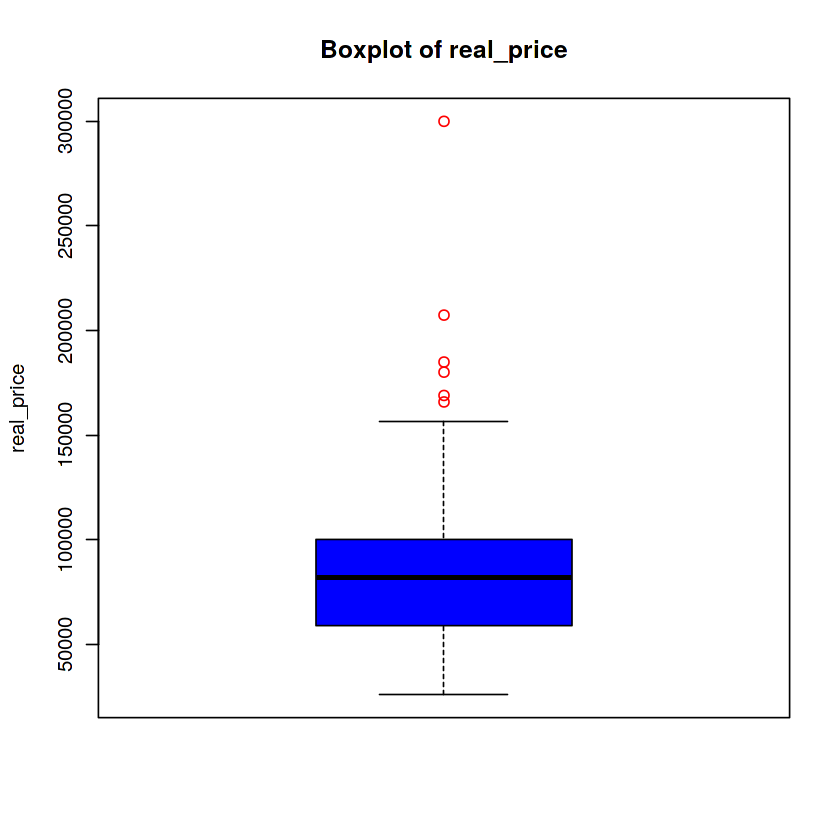

In [3]:
# See whether there is outlier or not.
bx_rprice<- boxplot(dumpdata$real_price,main="Boxplot of real_price" , ylab="real_price", col="blue", outcol="red")

When we look at boxplot of real_price variable we can see that there are some outliers. Since we have outliers in our dependent or independent variables, a log transformation could reduce the influence of those observations. Therefore, we will create new variable for logarithmic price.

In [4]:
dumpdata$lreal_price <- log(dumpdata$real_price)

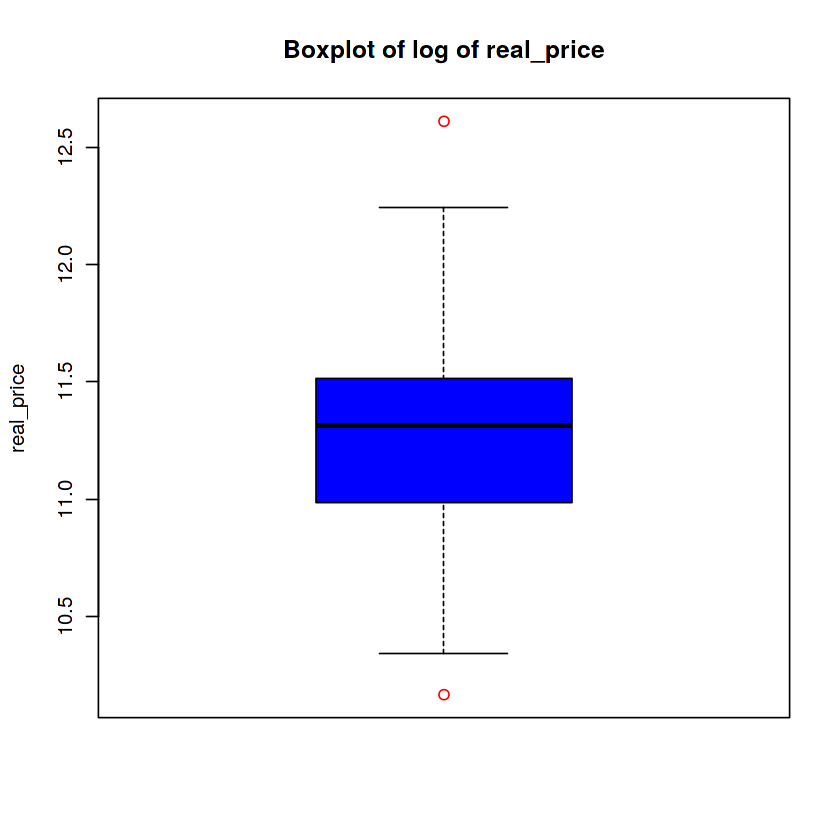

In [5]:
bx_l_rprice<- boxplot(dumpdata$lreal_price,main="Boxplot of log of real_price" , ylab="real_price", col="blue", outcol="red")

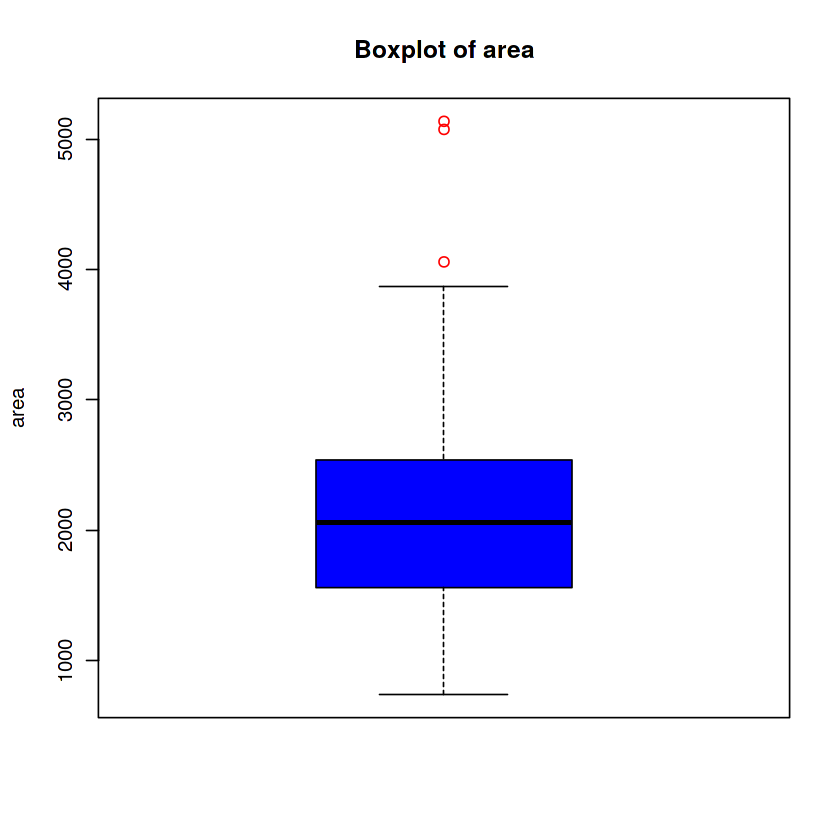

In [6]:
bx_area<- boxplot(dumpdata$area,main="Boxplot of area" , ylab="area", col="blue", outcol="red")

In [7]:
dumpdata$l_area <- log(dumpdata$area)

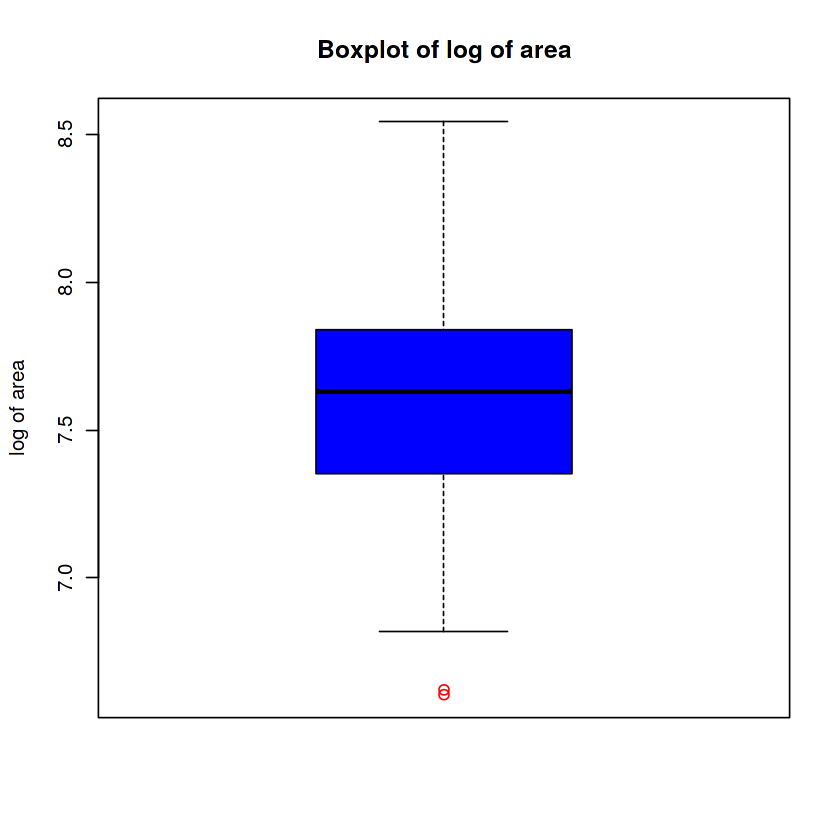

In [8]:
bx_larea<- boxplot(dumpdata$l_area,main="Boxplot of log of area" , ylab="log of area", col="blue", outcol="red")

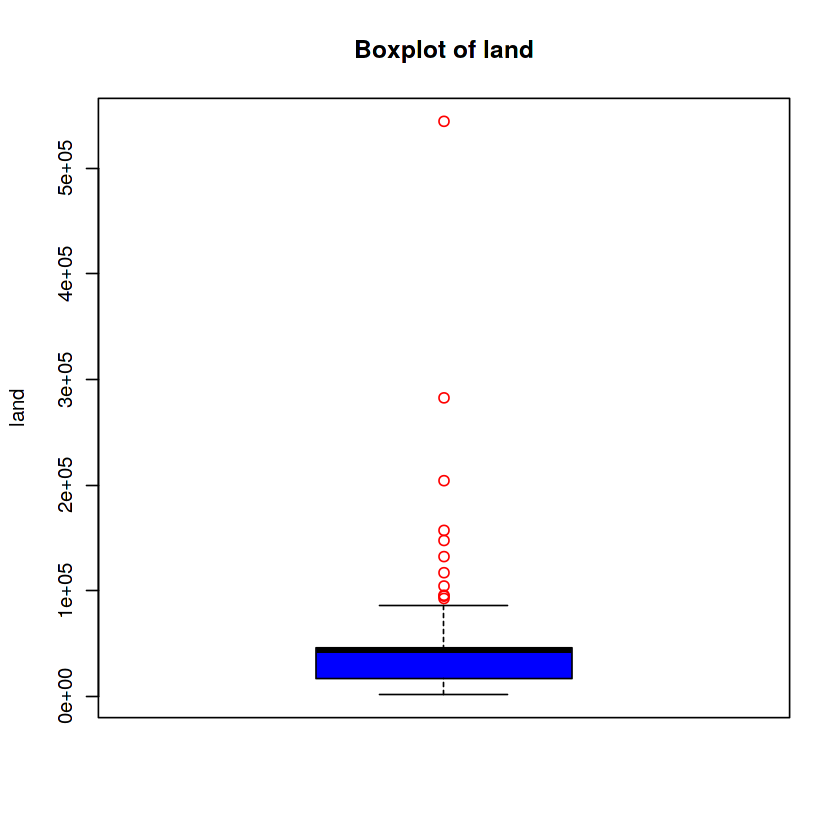

In [9]:
bx_land<- boxplot(dumpdata$land,main="Boxplot of land" , ylab="land", col="blue", outcol="red")

In [10]:
dumpdata$l_land <- log(dumpdata$land)

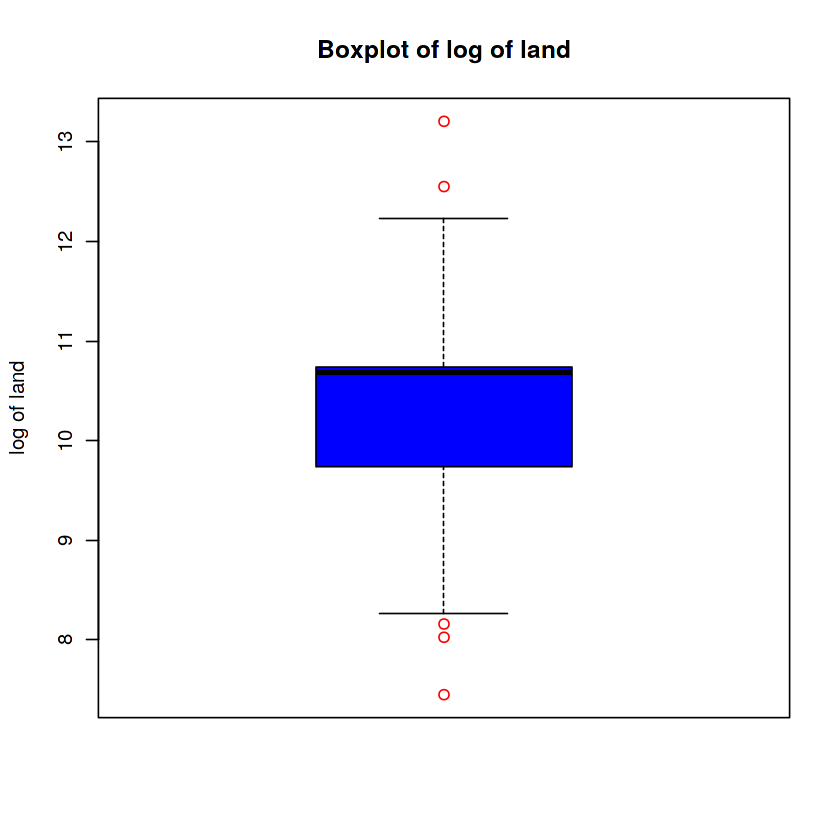

In [11]:
bx_l_land<- boxplot(dumpdata$l_land,main="Boxplot of log of land" , ylab="log of land", col="blue", outcol="red")

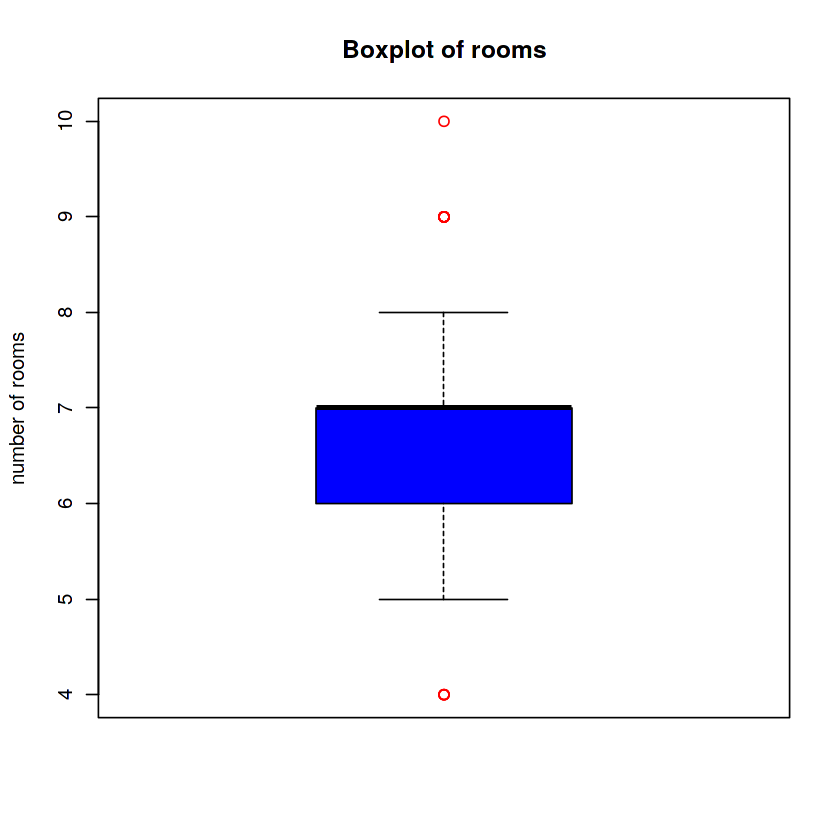

In [12]:
bx_rooms<- boxplot(dumpdata$rooms,main="Boxplot of rooms" , ylab="number of rooms", col="blue", outcol="red")

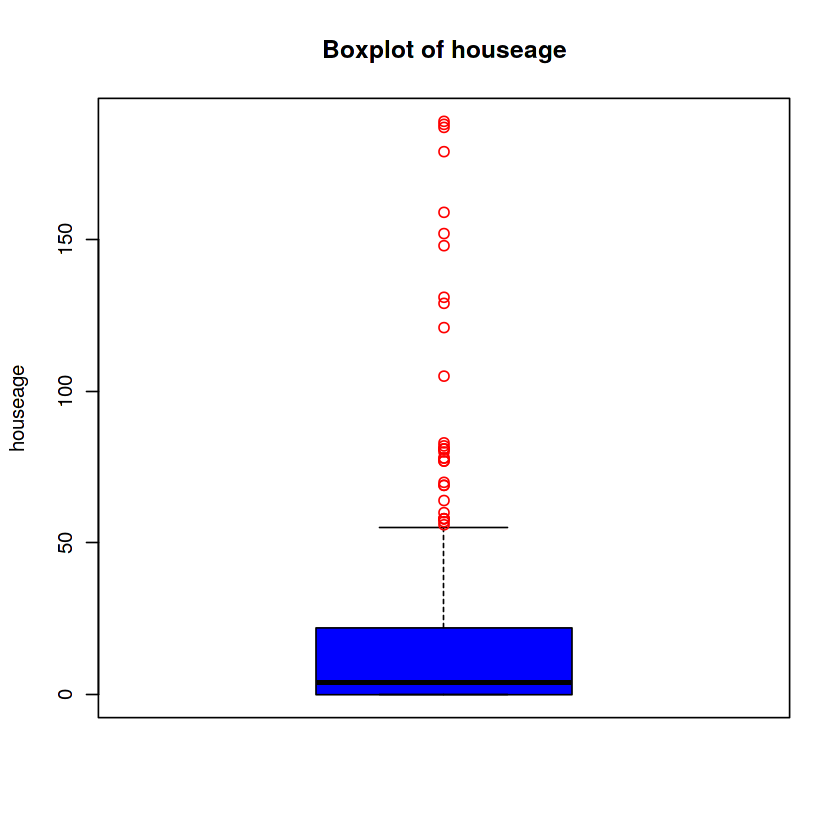

In [13]:
bx_houseage<- boxplot(dumpdata$houseage,main="Boxplot of houseage" , ylab="houseage", col="blue", outcol="red")

House age variable has so many outliers but here we cannot apply log transformation due to some house age values of 0. We tried to handle the outliers with capping method. This method takes all the outliers and puts them 1.5 times interquartile range away from the interquartile range.

In [14]:
dumpdata$houseage_sq <- dumpdata$houseage^2

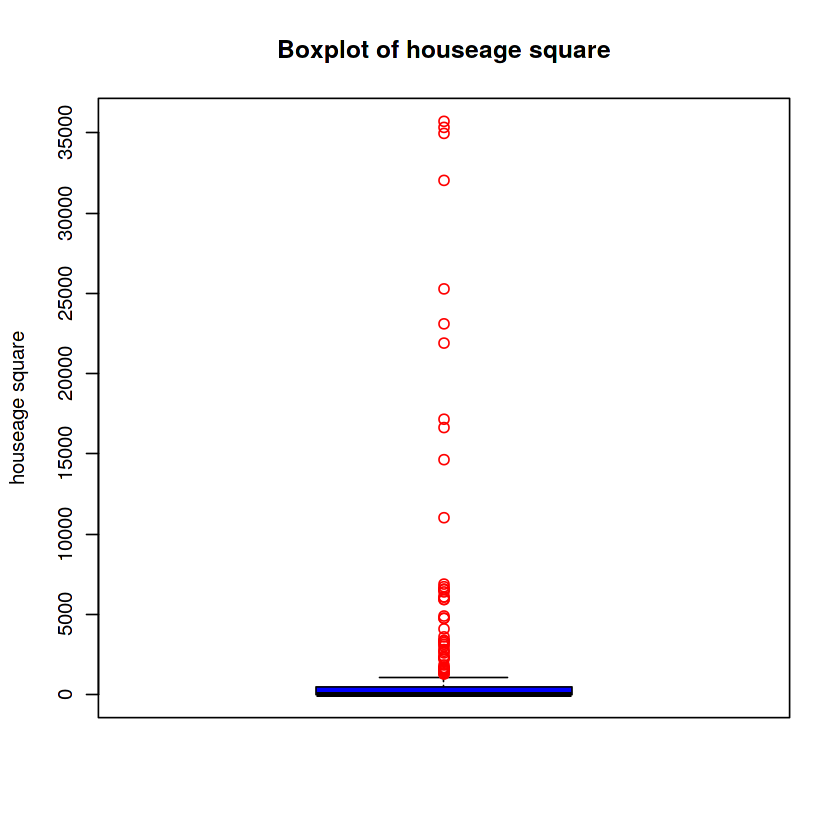

In [15]:
bx_houseage_sq<- boxplot(dumpdata$houseage_sq,main="Boxplot of houseage square" , ylab="houseage square", col="blue", outcol="red")

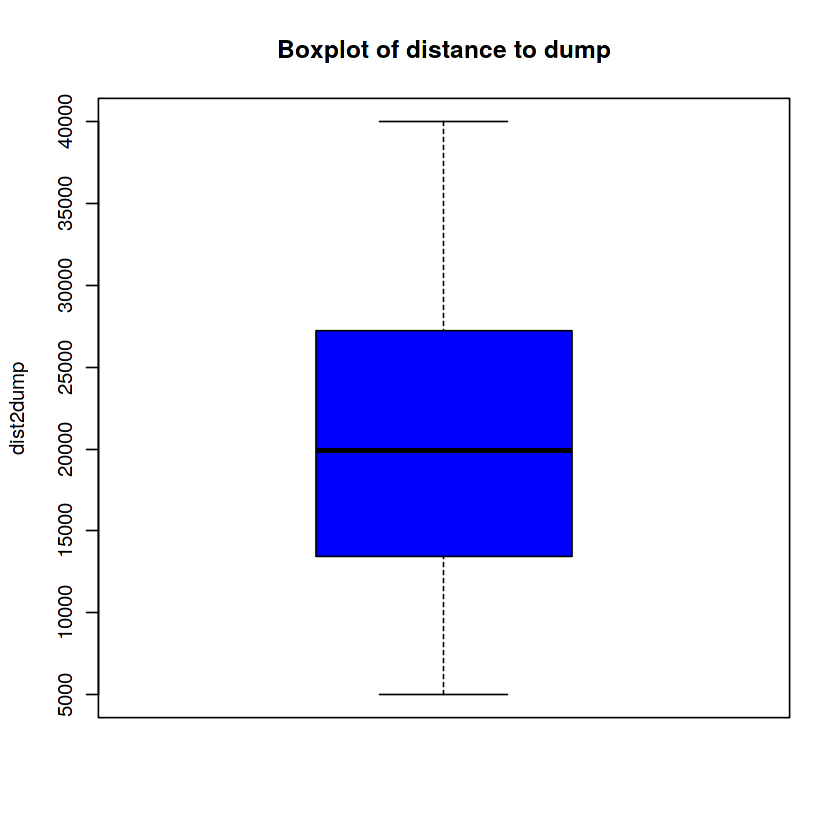

In [16]:
bx_dist2dump<- boxplot(dumpdata$dist2dump,main="Boxplot of distance to dump" , ylab="dist2dump", col="blue", outcol="red")

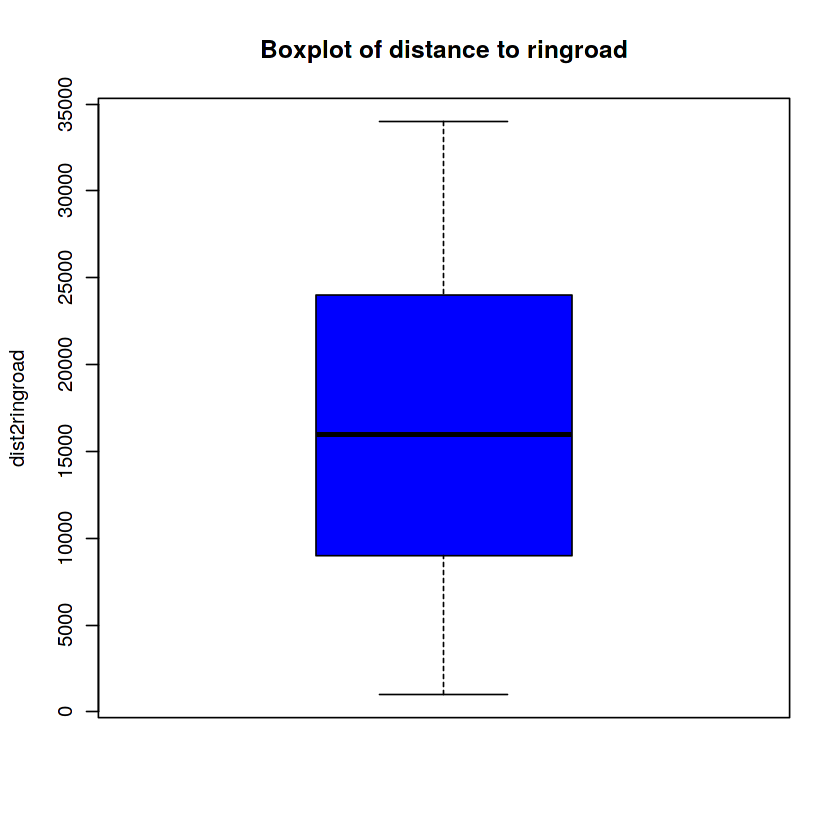

In [17]:
bx_dist2ringroad<- boxplot(dumpdata$dist2ringroad,main="Boxplot of distance to ringroad" , ylab="dist2ringroad", col="blue", outcol="red")

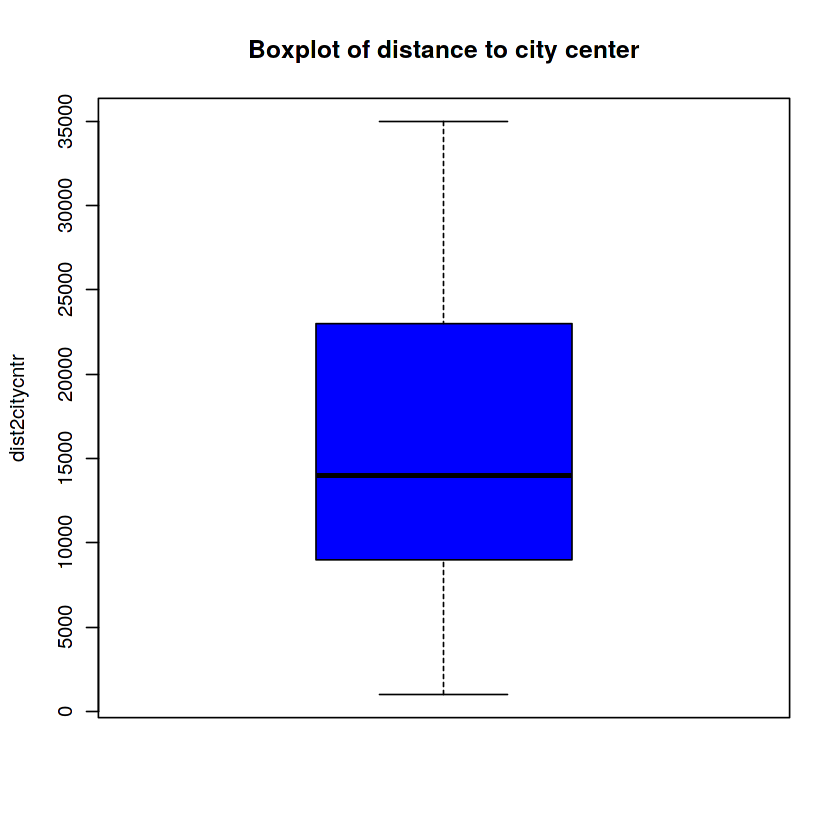

In [18]:
bx_dist2cintycntr<- boxplot(dumpdata$dist2citycntr,main="Boxplot of distance to city center" , ylab="dist2citycntr", col="blue", outcol="red")

Distance to dump, distance to ring road and distance to city center variables don’t have any outliers, so we keep these variables as they are.

# ANALYSIS

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



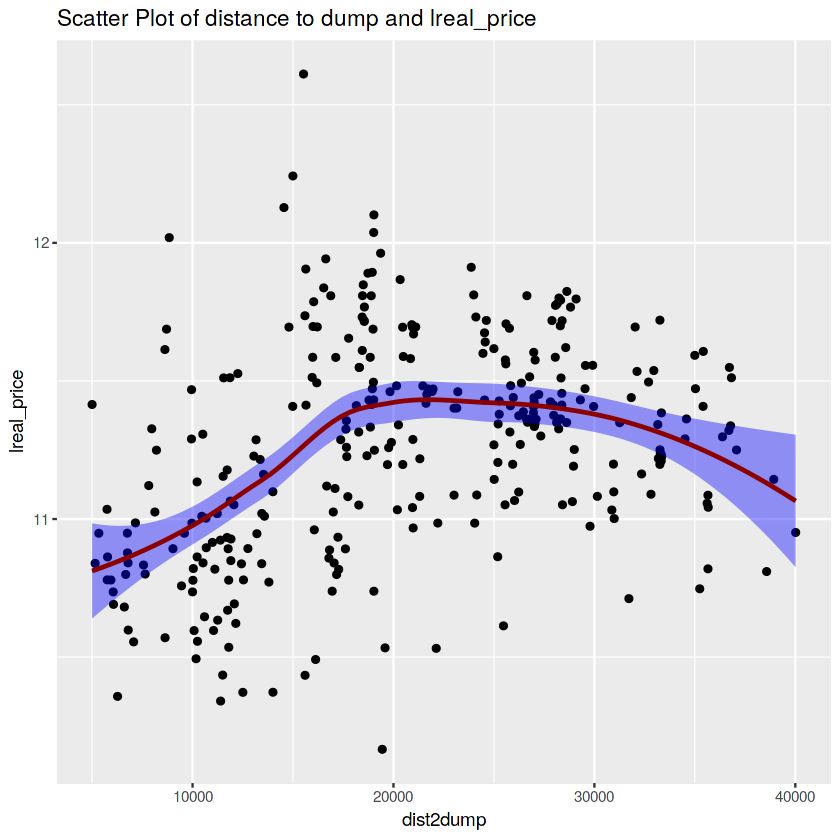

In [19]:
(sc_dist2dump <- ggplot(dumpdata, aes(dist2dump, lreal_price)) + geom_point() + geom_smooth(color="darkred", fill="blue")+
    labs(title="Scatter Plot of distance to dump and lreal_price"))

When we look at the plot, we can see that until distance to dump is approximately 17000 meters, the price of houses is increasing, but after that point, distance does not affect prices at all. When distance reached up approx. 25000 meters, the price of houses starts to decrease. We thought that what could have caused this situation might have been the home away from the city center. We can prove this situation by looking at the correlations of distance to the city center and distance to dump variables.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



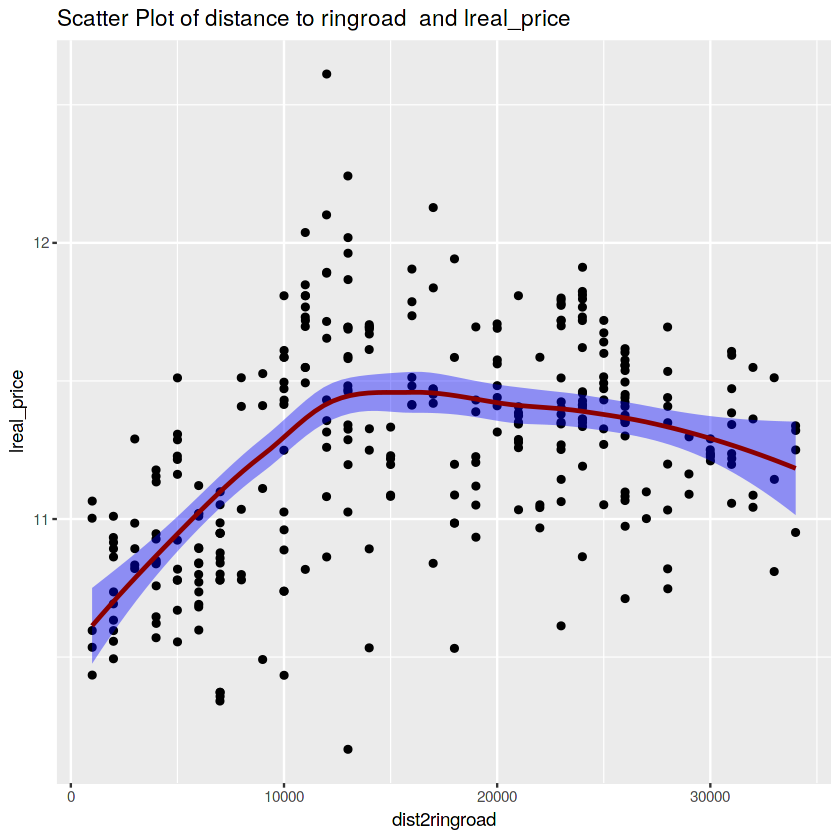

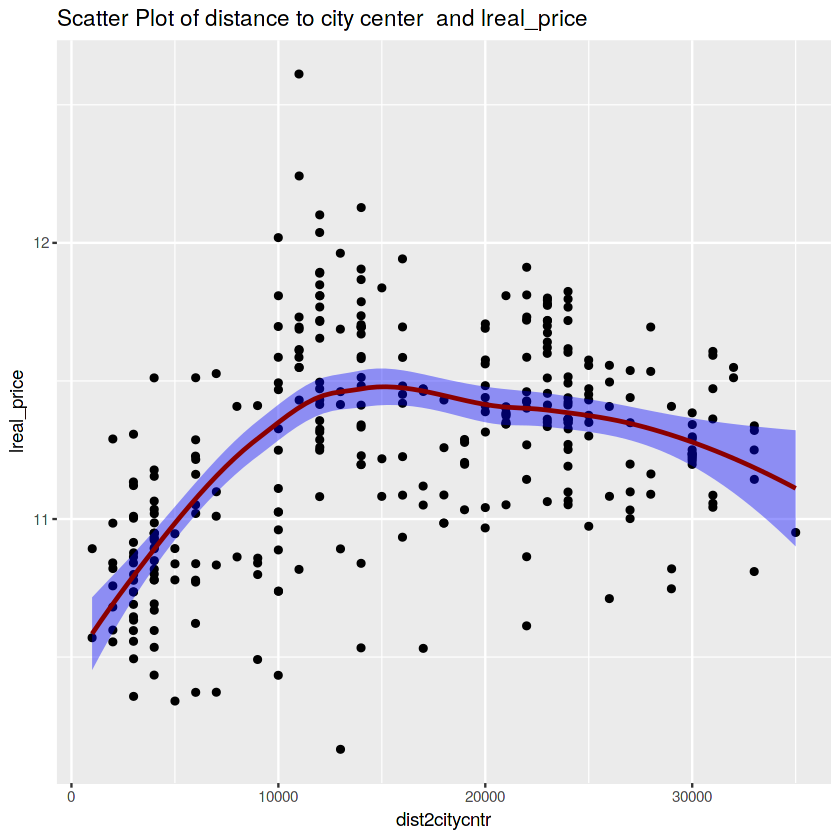

In [20]:
(sc_dist2ringroad <- ggplot(dumpdata, aes(dist2ringroad , lreal_price)) + geom_point() + geom_smooth(color="darkred", fill="blue")+
    labs(title="Scatter Plot of distance to ringroad  and lreal_price"))

(sc_dist2citycntr <- ggplot(dumpdata, aes(dist2citycntr , lreal_price)) + geom_point() + geom_smooth(color="darkred", fill="blue")+
    labs(title="Scatter Plot of distance to city center  and lreal_price"))

In [21]:
# see correlation between variables which represents distance.
cor(dumpdata[11:13])

,dist2citycntr,dist2ringroad,dist2dump
dist2citycntr,1.0000000,0.9873055,0.9593016
dist2ringroad,0.9873055,1.0000000,0.9165244
dist2dump,0.9593016,0.9165244,1.0000000


As we guessed, there is a 0.96 high positive correlation between distance to dump site and distance to city center. So, as distance to dump site increases, distance to city center also increases. While doing this correlation test, we also checked the correlation for the distance to ring road variable, which is an important variable for house prices, and it came out with a high correlation of 92 percent. In other words, as dump site distance increases, ring road distance increases. Thus, we can say that the location of the dump site is might be in the same area with city center and ring road. On the other hand, since we have a correlation between the distance variables in our dataset, we can use only one to mitigate having multicollinearity. We use dist2dump variable because we are investigating the effect of dump site to house prices.

Furthermore, the effect of the distance to dump site variable on prices disappears when the distance increases too much, because the discomfort limit given by the dump site is not infinite. Then, it might be due to the increase in the distance of the house to the city center and to the ring road. Therefore, we can create a dummy variable by accepting the distance as the limit for the distance to dump-site variable to make our model stable. If distance of house to dump site lower than that point, variable be 1 and otherwise, it becomes 0. For this reason, we created a dummy variable dist2dump lower than 15000 which we found by trial and error. We took different cut points and looked for the point, which we have higher absolute value (higher difference in means of the two group) of the coefficient of the dummies. When dist2dump lower than 10000, coefficient of near_dump is -0.32366 at 0.01 significance level. When dist2dump lower than 15000, coefficient of near_dump is -0.41254 at 0.01 significance level. When dist2dump lower than 17000, coefficient of near_dump is -0.32516 at 0.1 significance level. It seems like the distance to dump site affects house prices.


In [22]:
# Creating dummy variable for distance to dump.
dumpdata$near_dump <- ifelse(dumpdata$dist2dump < 15000, 1, 0)
head(dumpdata)

Obs,year,price,real_price,neighbourhood,area,land,rooms,baths,houseage,dist2citycntr,dist2ringroad,dist2dump,lreal_price,l_area,l_land,houseage_sq,near_dump
<dbl>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1989,60047,60047,4,1657,4580,7,1,49,3000,997,10669,11.00288,7.412764,8.429454,2401,1
2,1989,39984,39984,4,2614,8367,6,2,83,3999,1002,11044,10.59623,7.868637,9.032051,6889,1
3,1989,34023,34023,4,1142,4998,6,1,58,3996,1003,11499,10.43479,7.040536,8.516793,3364,1
4,1989,63891,63891,4,1135,10004,5,1,10,4000,1003,11878,11.06493,7.034388,9.210740,100,1
5,1989,44036,44036,4,1864,10003,5,1,47,4000,1998,12078,10.69276,7.530480,9.210640,2209,1
6,1989,45985,45985,4,1784,9496,6,3,77,2995,2004,9998,10.73607,7.486613,9.158626,5929,1


In [23]:
model1<- lm(formula = lreal_price ~ near_dump, data = dumpdata)
summary(model1)


Call:
lm(formula = lreal_price ~ near_dump, data = dumpdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.21234 -0.18637 -0.01595  0.20727  1.27649 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.37835    0.02247 506.316   <2e-16 ***
near_dump   -0.41254    0.04221  -9.774   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3408 on 319 degrees of freedom
Multiple R-squared:  0.2305,	Adjusted R-squared:  0.228 
F-statistic: 95.53 on 1 and 319 DF,  p-value: < 2.2e-16


When we made a regression model with lreal_price and new near_dump variable, as explain above if distance lower than 15.000 m it will be 1 and otherwise 0, our model becomes significant and R-squared is 0.23.  Coefficient of near_dump is -0.41 and this is a strong value. We have achieved a good model, as will be seen in the above results. 

If the house is near the dump site, house prices go down about 41%. Another issue is that whether the house prices have changed within the years or not, in other words, is the coefficient of the near_dump variables are same in both years?

To see whether house prices changed over time we use difference-in-difference model. Therefore, we are creating a dummy variable for year. Then, multiply dummy variable for year with near_dump variable.

In [24]:
# To use difference in difference model, we are creating a dummy variable for year
dumpdata$d89 <- ifelse(dumpdata$year == 1989, 1, 0)
# Then, multiply dummy variable for year with near_dump variable
dumpdata$dnear_dump <- dumpdata$near_dump * dumpdata$d89
head(dumpdata)

Obs,year,price,real_price,neighbourhood,area,land,rooms,baths,houseage,dist2citycntr,dist2ringroad,dist2dump,lreal_price,l_area,l_land,houseage_sq,near_dump,d89,dnear_dump
<dbl>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1989,60047,60047,4,1657,4580,7,1,49,3000,997,10669,11.00288,7.412764,8.429454,2401,1,1,1
2,1989,39984,39984,4,2614,8367,6,2,83,3999,1002,11044,10.59623,7.868637,9.032051,6889,1,1,1
3,1989,34023,34023,4,1142,4998,6,1,58,3996,1003,11499,10.43479,7.040536,8.516793,3364,1,1,1
4,1989,63891,63891,4,1135,10004,5,1,10,4000,1003,11878,11.06493,7.034388,9.210740,100,1,1,1
5,1989,44036,44036,4,1864,10003,5,1,47,4000,1998,12078,10.69276,7.530480,9.210640,2209,1,1,1
6,1989,45985,45985,4,1784,9496,6,3,77,2995,2004,9998,10.73607,7.486613,9.158626,5929,1,1,1


In [25]:
# make difference-in-difference model.
model2 <- lm(lreal_price ~ near_dump + d89 + dnear_dump, data = dumpdata)
summary(model2)


Call:
lm(formula = lreal_price ~ near_dump + d89 + dnear_dump, data = dumpdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.13253 -0.19801  0.03227  0.18341  1.31294 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.47851    0.03259 352.178  < 2e-16 ***
near_dump   -0.40251    0.06141  -6.554 2.26e-10 ***
d89         -0.17998    0.04369  -4.119 4.85e-05 ***
dnear_dump  -0.01665    0.08211  -0.203    0.839    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3292 on 317 degrees of freedom
Multiple R-squared:  0.2866,	Adjusted R-squared:  0.2799 
F-statistic: 42.46 on 3 and 317 DF,  p-value: < 2.2e-16


According to the result above, in the difference-in-difference model, near_dump and the d89 variables, which is the dummy of the year variable, are significant and the model's R-square is 0.28, this result was 0.22 in the previous model.  But dnear_dump is not significant, and this means that there is not significant difference on house prices between the years. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



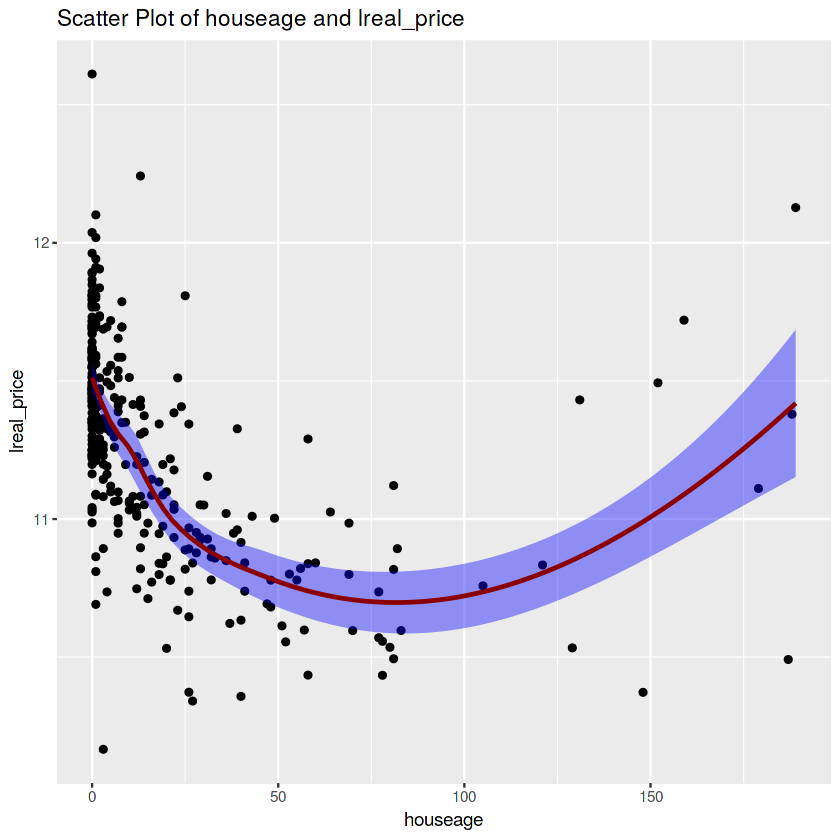

In [26]:
# to see relationship between independent variables  and lreal_price variables, check the plot below.
(sc_houseage <- ggplot(dumpdata, aes(houseage, lreal_price)) + geom_point() + geom_smooth(color="darkred", fill="blue")+
    labs(title="Scatter Plot of houseage and lreal_price"))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



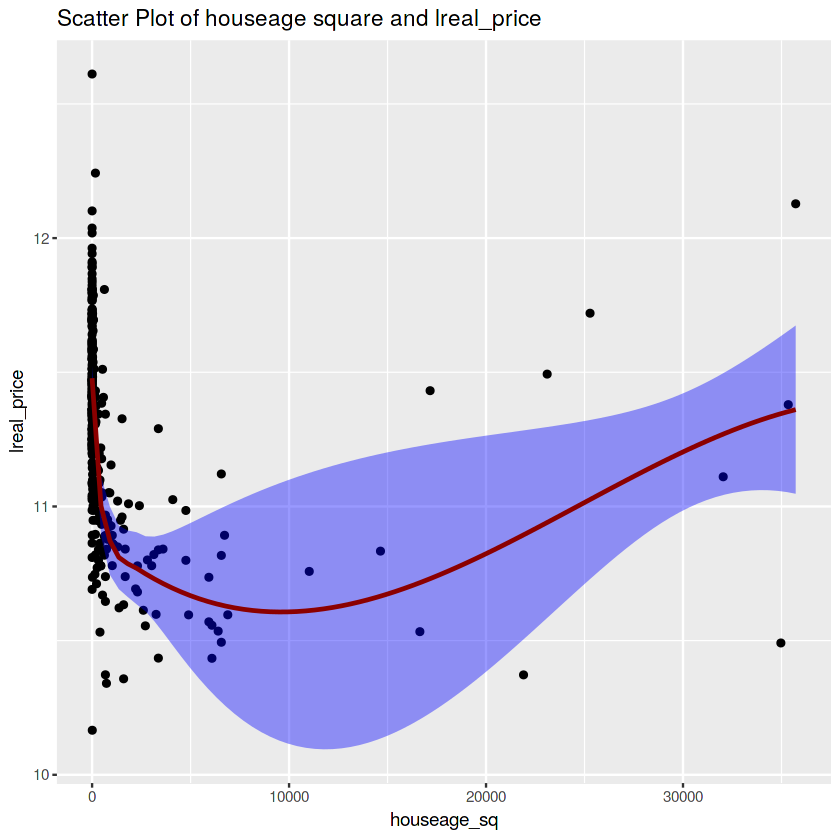

In [27]:
(sc_houseage_sq <- ggplot(dumpdata, aes(houseage_sq, lreal_price)) + geom_point() + geom_smooth(color="darkred", fill="blue")+
    labs(title="Scatter Plot of houseage square and lreal_price"))


We can see above on left plot lreal_price and houseage have a quadratic relationship. lreal_price decreases with the age of house grows but after some point, lreal_price starts to increase (the houses become older and they will be historical). So, the relationship between lreal_price and age are inverted U-shaped. As usual, the coefficient of age is expected to be positive and then on age^2 to be negative. The aim here is that there is a theoretical explanation of the empirical reason for including the square of the feature also as shown above there are some outliers. Therefore, we created houseage_sq variable and now as shown above on the right plot, there is an almost linear relationship.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



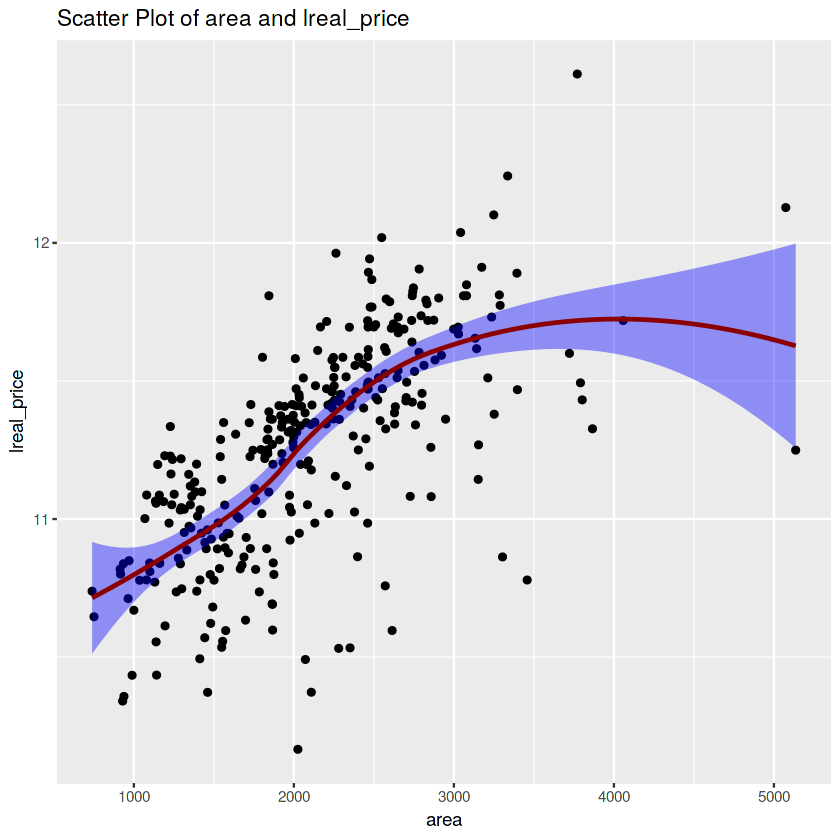

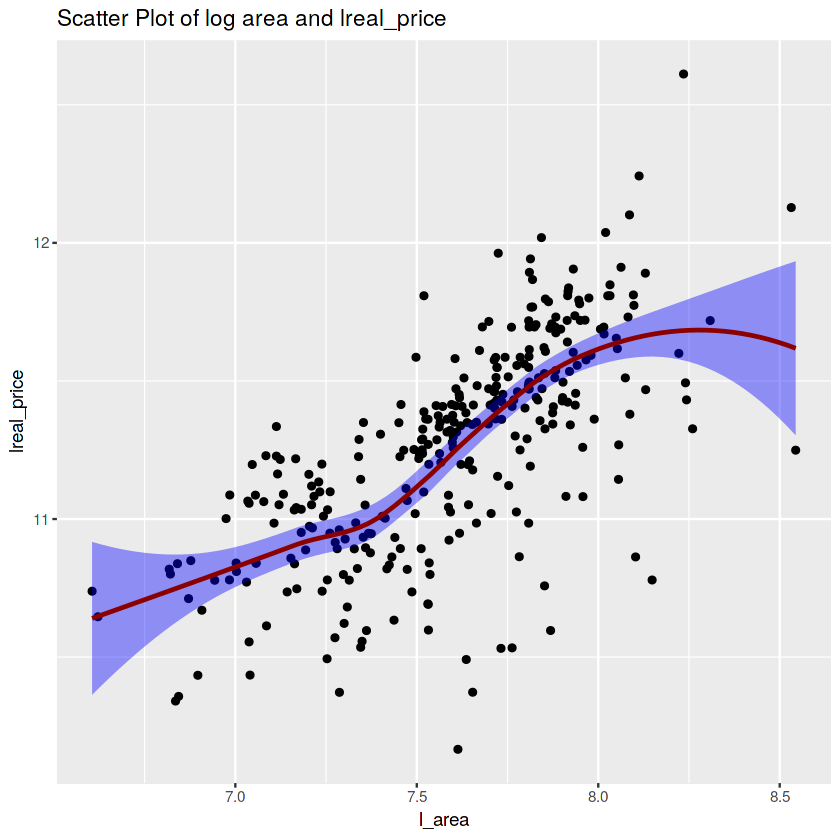

In [28]:
(sc_area <- ggplot(dumpdata, aes(area, lreal_price)) + geom_point() + geom_smooth(color="darkred", fill="blue")+
    labs(title="Scatter Plot of area and lreal_price"))

(sc_l_area <- ggplot(dumpdata, aes(l_area, lreal_price)) + geom_point() + geom_smooth(color="darkred", fill="blue")+
    labs(title="Scatter Plot of log area and lreal_price"))

When we see boxplot of area, we saw that there are some outlier and If we have outliers, we may need a log transformation that could reduce the influence of those observations. On the other hand, the logarithm transformation is usually needed when the dependent and independent variables do not have a linear relationship, and probably a logarithmic relationship. As seen above, there is a non-linear relationship between area and lreal_price. As we know, the area of house is related to the price of the house. The increase in the area will affect the price of the house positively until a specific level, and after that, price of house will either flatten out or even it might decrease. This is the relationship between area and lreal_price. That is the other reason why we need transformed the area. So, we plotted it again. We could not literally change the non-linear relationship, but we have a better outcome.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



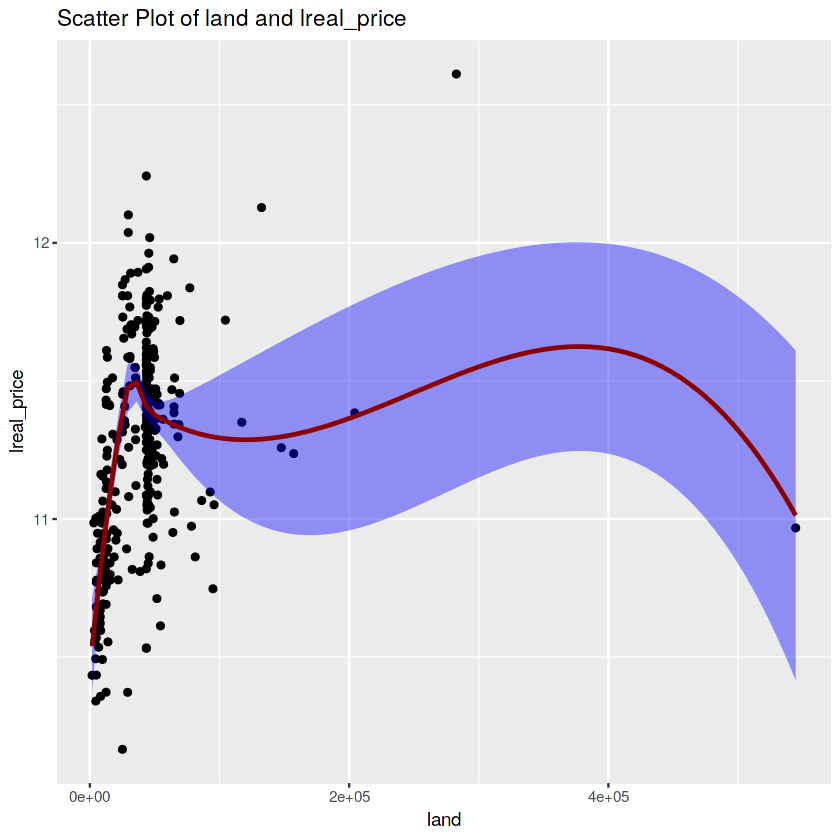

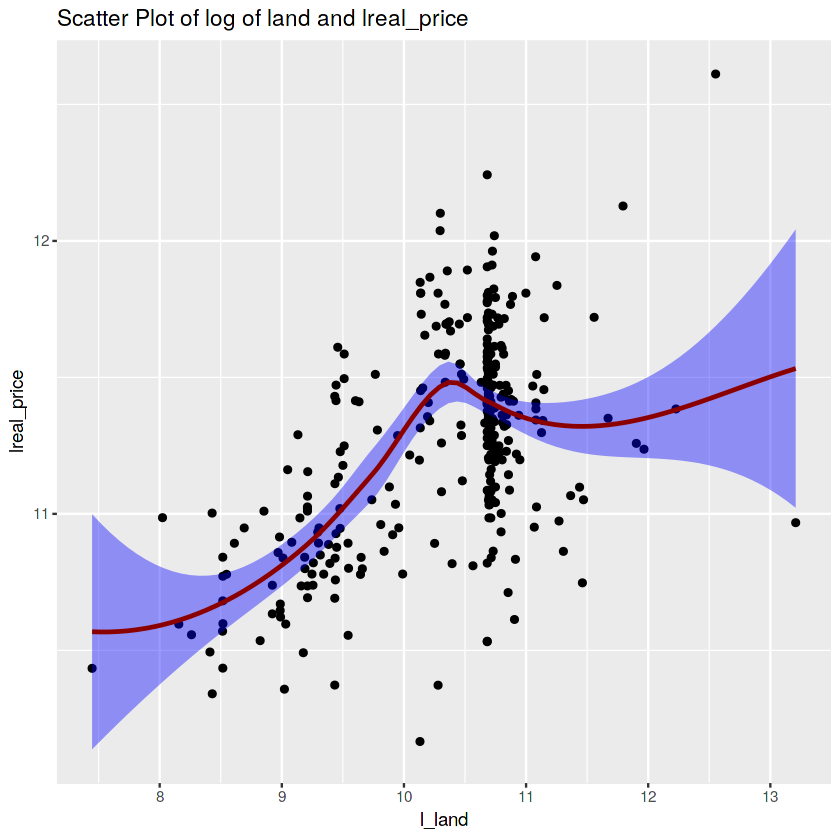

In [29]:
(sc_land <- ggplot(dumpdata, aes(land, lreal_price)) + geom_point() + geom_smooth(color="darkred", fill="blue")+
    labs(title="Scatter Plot of land and lreal_price"))

(sc_l_land <- ggplot(dumpdata, aes(l_land, lreal_price)) + geom_point() + geom_smooth(color="darkred", fill="blue")+
    labs(title="Scatter Plot of log of land and lreal_price"))

Similar to area, there is a nonlinear relationship between land and lreal_price, so the logarithm of this variable was again plotted, and a nearly linear relationship was obtained.

We want to transform neighbourhoods variable to a binary format that works better with classification and regression algorithms. This process is also known as One Hot Encoding.

In [30]:
# One hot encodings
for(unique_value in unique(dumpdata$neighbourhood)){
 

dumpdata[paste("nbh", unique_value, sep = "_")] <- ifelse(dumpdata$neighbourhood == unique_value, 1, 0)

}

head(dumpdata)

Obs,year,price,real_price,neighbourhood,area,land,rooms,baths,houseage,⋯,near_dump,d89,dnear_dump,nbh_4,nbh_0,nbh_2,nbh_1,nbh_6,nbh_5,nbh_3
<dbl>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1989,60047,60047,4,1657,4580,7,1,49,⋯,1,1,1,1,0,0,0,0,0,0
2,1989,39984,39984,4,2614,8367,6,2,83,⋯,1,1,1,1,0,0,0,0,0,0
3,1989,34023,34023,4,1142,4998,6,1,58,⋯,1,1,1,1,0,0,0,0,0,0
4,1989,63891,63891,4,1135,10004,5,1,10,⋯,1,1,1,1,0,0,0,0,0,0
5,1989,44036,44036,4,1864,10003,5,1,47,⋯,1,1,1,1,0,0,0,0,0,0
6,1989,45985,45985,4,1784,9496,6,3,77,⋯,1,1,1,1,0,0,0,0,0,0


As a conclusion we used variables in our model what we explained so far. And build a model.

In [31]:
nb0_0 <- dumpdata$lreal_price[dumpdata$nbh_0 == 0]
nb0_1 <- dumpdata$lreal_price[dumpdata$nbh_0 == 1]
t.test(nb0_0,nb0_1)


	Welch Two Sample t-test

data:  nb0_0 and nb0_1
t = -2.952, df = 215.6, p-value = 0.003507
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.22791093 -0.04541319
sample estimates:
mean of x mean of y 
 11.20989  11.34655 


The price distribution of neighbourhood 0 is significantly different than the price difference of all the other neighbourhoods at a significance level of 0.01. we add this variable to our regressors.

In [32]:
nb1_0 <- dumpdata$lreal_price[dumpdata$nbh_1 == 0]
nb1_1 <- dumpdata$lreal_price[dumpdata$nbh_1 == 1]
t.test(nb1_0,nb1_1)


	Welch Two Sample t-test

data:  nb1_0 and nb1_1
t = -2.2232, df = 31.716, p-value = 0.03346
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.31264900 -0.01361241
sample estimates:
mean of x mean of y 
 11.24768  11.41081 


In [33]:
nb2_0 <- dumpdata$lreal_price[dumpdata$nbh_2 == 0]
nb2_1 <- dumpdata$lreal_price[dumpdata$nbh_2 == 1]
t.test(nb2_0,nb2_1)


	Welch Two Sample t-test

data:  nb2_0 and nb2_1
t = -2.133, df = 96.648, p-value = 0.03546
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.177875882 -0.006400385
sample estimates:
mean of x mean of y 
 11.24791  11.34005 


In [34]:
nb3_0 <- dumpdata$lreal_price[dumpdata$nbh_3 == 0]
nb3_1 <- dumpdata$lreal_price[dumpdata$nbh_3 == 1]
t.test(nb3_0,nb3_1)


	Welch Two Sample t-test

data:  nb3_0 and nb3_1
t = 0.83747, df = 6.2984, p-value = 0.433
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2239057  0.4610222
sample estimates:
mean of x mean of y 
 11.26398  11.14543 


In [35]:
nb4_0 <- dumpdata$lreal_price[dumpdata$nbh_4 == 0]
nb4_1 <- dumpdata$lreal_price[dumpdata$nbh_4 == 1]
t.test(nb4_0,nb4_1)


	Welch Two Sample t-test

data:  nb4_0 and nb4_1
t = 12.792, df = 124.11, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.4152322 0.5672412
sample estimates:
mean of x mean of y 
 11.35322  10.86198 


In [36]:
nb5_0 <- dumpdata$lreal_price[dumpdata$nbh_5 == 0]
nb5_1 <- dumpdata$lreal_price[dumpdata$nbh_5 == 1]
t.test(nb5_0,nb5_1)


	Welch Two Sample t-test

data:  nb5_0 and nb5_1
t = -1.778, df = 55.569, p-value = 0.08088
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.155826149  0.009295879
sample estimates:
mean of x mean of y 
 11.25524  11.32850 


In [37]:
nb6_0 <- dumpdata$lreal_price[dumpdata$nbh_6 == 0]
nb6_1 <- dumpdata$lreal_price[dumpdata$nbh_6 == 1]
t.test(nb6_0,nb6_1)


	Welch Two Sample t-test

data:  nb6_0 and nb6_1
t = -3.147, df = 46.122, p-value = 0.002889
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.28066406 -0.06169553
sample estimates:
mean of x mean of y 
 11.24433  11.41551 


We transformed neighbourhood variable to a binary format that works better with classification and regression algorithms. This process is also known as one hot encoding. We think of introducing neighbourhood 0 dummy to the model. The t-test results for the prices in neighbourhood 0 and all the other neighbourhood is as above.

Also, rooms and baths variables will be included in the model. Below is our final model with the variables we discussed so far. We will test this model for linear regression assumptions.

In [38]:
model3 <- lm(lreal_price ~ near_dump + d89 + houseage + houseage_sq + l_area + l_land + nbh_0 +rooms +baths , data = dumpdata)

summary(model3)


Call:
lm(formula = lreal_price ~ near_dump + d89 + houseage + houseage_sq + 
    l_area + l_land + nbh_0 + rooms + baths, data = dumpdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.23188 -0.09716  0.01315  0.10609  0.80710 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.424e+00  3.826e-01  19.402  < 2e-16 ***
near_dump   -1.169e-02  3.565e-02  -0.328 0.743158    
d89         -1.180e-01  2.383e-02  -4.951 1.21e-06 ***
houseage    -6.278e-03  1.347e-03  -4.661 4.67e-06 ***
houseage_sq  2.605e-05  8.397e-06   3.102 0.002096 ** 
l_area       3.542e-01  5.150e-02   6.878 3.34e-11 ***
l_land       6.925e-02  2.057e-02   3.367 0.000854 ***
nbh_0        6.829e-02  2.504e-02   2.727 0.006750 ** 
rooms        4.609e-02  1.737e-02   2.653 0.008399 ** 
baths        1.072e-01  2.736e-02   3.919 0.000110 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2039 on 311 degrees of freedom
Multiple R

From the output we can see the following:
The overall F-statistic of the model is 94.11 and the corresponding p-value is approximately 0. This indicates that the overall model is statistically significant. In other words, the regression model as a whole is useful.

D89, houseage, l_area, l_land and baths are statistically significant at the 0.01 significance level. In particular, the coefficients from the model output tells that;
* When year is 1989, in other words when d89 variables is 1, then d89 is associated with an approximately 11.8% decrease in real_price on average, assuming all other variables are held constant.
* An increase in houseage by one year is associated with an approximately 0.63% decrease in real_price on average, assuming all other variables are held constant.
* An increase in area by 1% is associated with a 35.42% increase in real_price on average, assuming all other variables are held constant.
* An increase in land by 1% is associated with an approximately 6.925% increase in real_price on average, assuming all other variables are held constant.
* An increase in number of baths by 1 is associated with a 10.72% increase in real_price on average, assuming all other variables are held constant.

Houseage_sq, nbh_0 and rooms are statistically significant at the 0.05 significance level. In particular, the coefficient from the model output tells that;
* An increase in houseage_sq by 1 is associated with an approximately 0.003% increase in real_price on average, assuming all other variables are held constant.
* When neighbourhood is 0, in other words when nbh_0 variable is 1, then nbh_0 is associated with an approximately 6.829% increase in real_price on average, assuming all other variables are held constant.
* An increase in rooms by 1 is associated with an approximately 4.609% increase in real_price on average, assuming all other variables are held constant.

The adjusted R-squared is 0.7237. This indicates that 72.37% of the variance in lreal_price can be explained by the predictors in the model.


### Testing for Non-Linear Functional Form 
To understand whether the model is linear, we use Ramsey’s RESET test. 

*Hypothesis:* 
> Ho: the model is linear.

> H1: the model is non-linear. 


In [39]:
resettest(model3)



	RESET test

data:  model3
RESET = 7.1781, df1 = 2, df2 = 309, p-value = 0.0008971


We tested our model for linearity. The p-value of the test is 0.0009 which is lower than 0.05. So, we do reject the null hypothesis. Our model is non-linear so maybe we need to introduce some squares to our model. 

We consider checking linearity of log area.

In [40]:
model4 <- lm(lreal_price ~ l_area, data = dumpdata)
summary(model4)


Call:
lm(formula = lreal_price ~ l_area, data = dumpdata)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1080 -0.1351  0.0540  0.1744  0.8494 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.2976     0.3513   15.08   <2e-16 ***
l_area        0.7850     0.0462   16.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2815 on 319 degrees of freedom
Multiple R-squared:  0.4751,	Adjusted R-squared:  0.4734 
F-statistic: 288.7 on 1 and 319 DF,  p-value: < 2.2e-16


We used Ramsey Reset test to check linearity.

In [41]:
resettest(model4)


	RESET test

data:  model4
RESET = 4.7658, df1 = 2, df2 = 317, p-value = 0.009136


As in the table above, we can say that even if we transformed area to logarithm, it is non-linear. Therefore, we create square of log area and include it in the model.

In [42]:
dumpdata$l_area_sq <- (dumpdata$l_area)^2

In [43]:
model5 <- lm(lreal_price ~ houseage + houseage_sq + baths + d89 +  near_dump + + l_land + rooms  + nbh_0 +  l_area + l_area_sq , data = dumpdata)

summary(model5)


Call:
lm(formula = lreal_price ~ houseage + houseage_sq + baths + d89 + 
    near_dump + +l_land + rooms + nbh_0 + l_area + l_area_sq, 
    data = dumpdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.22147 -0.09334  0.01257  0.10171  0.74189 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.874e+01  4.490e+00   4.174 3.90e-05 ***
houseage    -6.105e-03  1.337e-03  -4.566 7.18e-06 ***
houseage_sq  2.386e-05  8.370e-06   2.851  0.00466 ** 
baths        1.133e-01  2.723e-02   4.160 4.12e-05 ***
d89         -1.096e-01  2.386e-02  -4.593 6.35e-06 ***
near_dump   -2.538e-02  3.576e-02  -0.710  0.47831    
l_land       6.333e-02  2.052e-02   3.086  0.00221 ** 
rooms        4.803e-02  1.724e-02   2.785  0.00567 ** 
nbh_0        6.567e-02  2.485e-02   2.643  0.00863 ** 
l_area      -2.638e+00  1.184e+00  -2.228  0.02659 *  
l_area_sq    1.980e-01  7.828e-02   2.530  0.01191 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ 

The overall F-statistic of the model dropped to 86.81 but the corresponding p-value is still very close to 0. This indicates that the overall model is statistically significant. In other words, the regression model as a whole is useful.

* D89, houseage and baths are statistically significant at 0.01 significance level. In particular, the coefficients from the model output doesn’t change much.
*	Houseage_sq, nbh_0 and rooms are statistically significant at 0.05 significance level. The significance of l_land dropped to 0.05 significance level. In particular, the coefficient from the model output doesn’t change much.
*	L_area_sq is statistically significant at 0.10 significance level. The significance of l_area dropped to 0.10 significance level. In particular, the coefficients from the model output tells that;
* An increase in area by 1% is associated with an approximately 263.8% increase in real_price on average, assuming all other variables are held constant.
* An increase in area_sq by 1% is associated with an approximately 19.8% increase in real_price on average, assuming all other variables are held constant.

The adjusted R-squared is 0.7284. This indicates that 72.84% of the variance in lreal_price can be explained by the predictors in the model.


### Testing for Heteroskedasticity
Heteroskedasticity happens while the standard errors of a variable, observed over a particular amount of time, are non-constant. Heteroskedasticity is a violation of the assumptions for linear regression modeling, and so it can influence the validity of our model.

*Hypothesis:* 

> Ho: There is no heteroskedasticity. 

> H1: There is heteroskedasticity


In [44]:
bptest(model5)


	studentized Breusch-Pagan test

data:  model5
BP = 17.699, df = 10, p-value = 0.06025


The p-value is higher than 0.05 we have constant variance of residuals so there is no heteroskedasticity in the model.

### Testing for Non-Linear Functional Form 

In [45]:
resettest(model5)


	RESET test

data:  model5
RESET = 2.9188, df1 = 2, df2 = 308, p-value = 0.05549


Now, the p-value of the test is 0.055 which is higher than 0.05. So, we do not reject the null hypothesis. Our model is linear

### Test for Multicollinearity

We include as independent variables what we tested to see whether they are highly correlated. From the below table we can conclude that houseage and houseage_sq, l_area and l_area_sq are strongly correlated with each other which are normal.

In [46]:
all_vif<- vif(model5)
print(all_vif)

   houseage houseage_sq       baths         d89   near_dump      l_land 
  14.808000   12.655003    3.447798    1.102985    2.039584    2.119805 
      rooms       nbh_0      l_area   l_area_sq 
   1.890370    1.138704 1273.552570 1267.166175 


### Testing for Non-normally Distributed Residuals 

*Hypothesis: *
> Ho: There is no non-normally distributed residuals. 

> H1: There is non-normally distributed residuals.


-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9325         0.0000 
Kolmogorov-Smirnov        0.0872         0.0152 
Cramer-von Mises         74.2029         0.0000 
Anderson-Darling          4.104          0.0000 
-----------------------------------------------

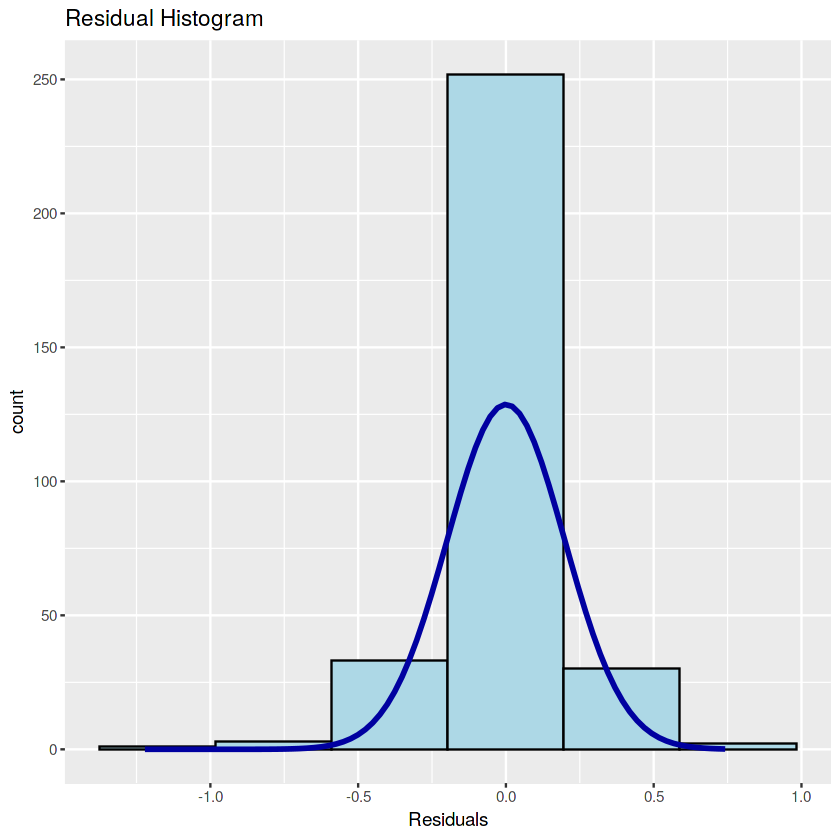

In [47]:
ols_test_normality(model5)
ols_plot_resid_hist(model5)

We could inspect this phenomenon by looking at the histogram below which looks skewed. Also, we can check it with the p-value of the Shapiro-Wilk test which is below 0.05 so we reject null hypothesis. Our residuals are non-normally distributed.

This is our final model. We still have non-normality of residuals problem. We will now try to solve this issue with different approaches using this model as a base model.

## SOLUTIONS

### 1 - REMOVAL OF INFLUENTIAL OBSERVATIONS

#### Identifying outliers
If the studentized residuals are far from the equation, and are an outlier on the predictors, then it can overly influence the equation. A general measurement for influence is Cook’s Distance. Cook’s distance helps to identify points that negatively affect your regression model. If a data point has a large cook’s d, the data point indicates that strongly influences the fitted values. The measurement is a combination of each observation’s leverage and residual values; the higher the leverage and residuals, the higher the Cook’s distance.

For computing Cook’s distance, we firstly generate a new variable which is the absolute value of the residuals. To see the observations with the highest absolute residual values to the lowest one. Then examine rows one by one to find out why these rows could be tagged as influential observations and how to affect the regression model when remaining (n-1) observations.


In [48]:
plot(d1, pch="*", cex=2, main="Influential Obs by Cooks distance")  # plot cook's distance
abline(h = 4*mean(d1, na.rm=T), col="red")  # add cutoff line
text(x=1:length(d1)+1, y=d1, labels=ifelse(d1>4*mean(d1, na.rm=T),names(d1),""), col="red")  # add labels

ERROR: Error in plot(d1, pch = "*", cex = 2, main = "Influential Obs by Cooks distance"): object 'd1' not found


In [49]:
d1 <- cooks.distance(model5)
r <- stdres(model5)
a <- cbind(dumpdata, d1, r)
a[d1 > 4/321, ]

,Obs,year,price,real_price,neighbourhood,area,land,rooms,baths,houseage,⋯,nbh_4,nbh_0,nbh_2,nbh_1,nbh_6,nbh_5,nbh_3,l_area_sq,d1,r
,<dbl>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1989,60047,60047.00,4,1657,4580,7,1,49,⋯,1,0,0,0,0,0,0,54.94907,0.01261107,1.682795
16,16,1989,80008,80008.00,4,1838,9246,7,2,58,⋯,1,0,0,0,0,0,0,56.49677,0.01799012,2.318878
23,23,1989,37549,37549.00,2,2351,43562,7,2,129,⋯,0,0,1,0,0,0,0,60.25790,0.02494028,-2.033793
34,34,1989,35999,35999.00,0,2072,9663,6,2,187,⋯,0,1,0,0,0,0,0,58.31261,0.17572212,-2.281730
37,37,1989,43953,43953.00,4,1866,12501,6,2,1,⋯,1,0,0,0,0,0,0,56.72428,0.01300467,-1.928403
45,45,1989,31963,31963.00,0,1461,29131,6,2,148,⋯,0,1,0,0,0,0,0,53.09857,0.04076260,-1.951363
46,46,1989,31976,31976.00,0,2109,12500,6,2,26,⋯,0,1,0,0,0,0,0,58.58324,0.03133287,-3.388292
52,52,1989,37481,37481.00,0,2280,43563,4,1,20,⋯,0,1,0,0,0,0,0,59.78275,0.05237793,-2.449650
58,58,1989,48009,48009.00,4,3458,11417,7,2,55,⋯,1,0,0,0,0,0,0,66.39717,0.02088404,-1.872528


In [50]:
rabs <- abs(r)
a <- cbind(dumpdata, d1, r, rabs)
asorted <- a[order(-rabs), ]
asorted[1:20, 1:13]

,Obs,year,price,real_price,neighbourhood,area,land,rooms,baths,houseage,dist2citycntr,dist2ringroad,dist2dump
,<dbl>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
168,168,1989,26004,26004.00,0,2025,25116,7,3,3,13003,13001,19442
230,230,1992,100028,76826.42,1,5136,47914,7,3,0,9999,14001,8202
157,157,1989,299981,299981.00,0,3771,282703,7,3,0,10996,12003,15522
259,259,1992,68008,52233.49,6,2398,45738,7,3,1,21999,23997,25188
46,46,1989,31976,31976.00,0,2109,12500,6,2,26,7001,7001,14001
315,315,1992,174981,134394.01,0,1844,29128,6,2,25,10002,10000,16878
303,303,1992,270007,207378.66,0,3336,43564,7,3,13,11005,12997,14993
52,52,1989,37481,37481.00,0,2280,43563,4,1,20,17002,17995,22128
227,227,1992,215983,165885.57,1,2549,46172,7,3,1,9996,13003,8839


Above table represents the observations with the highest absolute residual values to lowest one. When we started removing observations one by one, we found out that Obs 168, 230, 157, 46, 259, 315, 303, 227, 52, 34, 182, and 166 as possibly problematic to our model. Observations 168, 157, 303, 230 and 34 are outliers and rest of the observations (46, 259, 315, 227, 52, 182, 166) should be either high leverage points or influential observations.

* Obs 168 seems to be the highest extreme value which has very low real_price. (range of real_price is from 26004 to 299981), whereas Obs 157 and 303 have very high real_price.
* Obs 230 has the maximum value for area. (range of area is from 739 to 5136). 
* Obs 34 has very high value of houseage. (range of houseage is from 0 to 189). 

We drop them from the regression and fit the model without them to see how the results change.


In [51]:
model6 <- lm(lreal_price ~ houseage + houseage_sq + baths + d89 +
     near_dump + l_area + l_area_sq + rooms + nbh_0 + 
    l_land, data = dumpdata, subset = Obs != 168 & Obs != 230 & 
    Obs != 157 & Obs != 46 & Obs != 259 & Obs != 315 & Obs != 
    303 & Obs != 227 & Obs != 52 & Obs != 34 & Obs != 182 & Obs != 166 )

summary(model6)


Call:
lm(formula = lreal_price ~ houseage + houseage_sq + baths + d89 + 
    near_dump + l_area + l_area_sq + rooms + nbh_0 + l_land, 
    data = dumpdata, subset = Obs != 168 & Obs != 230 & Obs != 
        157 & Obs != 46 & Obs != 259 & Obs != 315 & Obs != 303 & 
        Obs != 227 & Obs != 52 & Obs != 34 & Obs != 182 & Obs != 
        166)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44680 -0.09283  0.00288  0.09156  0.46861 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.944e+01  3.750e+00   5.183 4.03e-07 ***
houseage    -7.527e-03  1.085e-03  -6.935 2.52e-11 ***
houseage_sq  3.454e-05  7.106e-06   4.861 1.89e-06 ***
baths        1.027e-01  2.145e-02   4.789 2.65e-06 ***
d89         -9.171e-02  1.888e-02  -4.856 1.93e-06 ***
near_dump   -5.073e-02  2.898e-02  -1.750  0.08110 .  
l_area      -2.752e+00  9.958e-01  -2.764  0.00607 ** 
l_area_sq    2.091e-01  6.604e-02   3.167  0.00170 ** 
rooms        3.051e-02  1.391e-02   2.194

In the new model, we have 309 observations left. From the output we can see the following:

* The overall F-statistic of the model is 137.9 and the corresponding p-value is approximately 0. This indicates that the overall model is statistically significant. In other words, the regression model as a whole is useful.
* houseage, houseage_sq, baths and d89 are statistically significant at the 0.01 significance level. In particular, the coefficients from the model output tells that;

    * An increase in houseage by one year is associated with an approximately 0.75% decrease in lreal_price on average, assuming all other variables are held constant.
	* An increase in houseage_sq by 1 is associated with an approximately 0.003% increase in lreal_price on average, assuming all other variables are held constant.
    * An increase in number of baths by 1 is associated with a 10.27% increase in lreal_price on average, assuming all other variables are held constant.
    * When year is 1989, in other words when d89 variables is 1, then d89 is associated with an approximately 9.17% decrease in lreal_price on average, assuming all other variables are held constant.
    
* L_area, l_area_sq and nbh_0 are statistically significant at the 0.05 significance level. In particular, the coefficient from the model output tells that;
    
    * An increase in l_area by 1% is associated with a 275.2% decrease in lreal_price on average, assuming all other variables are held constant.
    * An increase in l_area_sq by 1 is associated with a 20.91% increase in lreal_price on average, assuming all other variables are held constant.
    * When neighbourhood is 0, in other words when nbh_0 variable is 1, then nbh_0 is associated with an approximately 6.04% increase in lreal_price on average, assuming all other variables are held constant.
    
* Rooms, near_dump and l_land are statistically significant at the 0.10 significance level. In particular, the coefficient from the model output tells that;

    * An increase in rooms by 1 is associated with an approximately 3.05% increase in lreal_price on average, assuming all other variables are held constant.
    * The houses near the dump site are 5.07% cheaper than the ones that are far to the dump site.
    * An increase in l_land by 1% is associated with an approximately 3.27% increase in lreal_price on average, assuming all other variables are held constant.

The adjusted R-squared is 0.8164. This indicates that 81.64% of the variance in lreal_price can be explained by the predictors in the model.


In [52]:
bptest(model6)


	studentized Breusch-Pagan test

data:  model6
BP = 17.41, df = 10, p-value = 0.06578


P-value is above 0.05 we have constant variance of residuals so there is no heteroskedasticity in the model.

In [53]:
resettest(model6)


	RESET test

data:  model6
RESET = 2.4312, df1 = 2, df2 = 296, p-value = 0.08969


The p-value is 0.089 which means greater than 0.05. So, we do not reject the null hypothesis. Our model is linear now.

In [54]:
print(vif(model6))

   houseage houseage_sq       baths         d89   near_dump      l_area 
  14.838772   12.879953    3.474883    1.110181    2.131571 1420.304342 
  l_area_sq       rooms       nbh_0      l_land 
1415.392841    1.981510    1.154815    2.200498 


From the above table, we can say that we have same strongly correlated values for houseage, houseage_sq, l_area and l_area_sq which are normal.

-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9909         0.0517 
Kolmogorov-Smirnov        0.0497         0.4292 
Cramer-von Mises         75.3887         0.0000 
Anderson-Darling          0.804          0.0370 
-----------------------------------------------

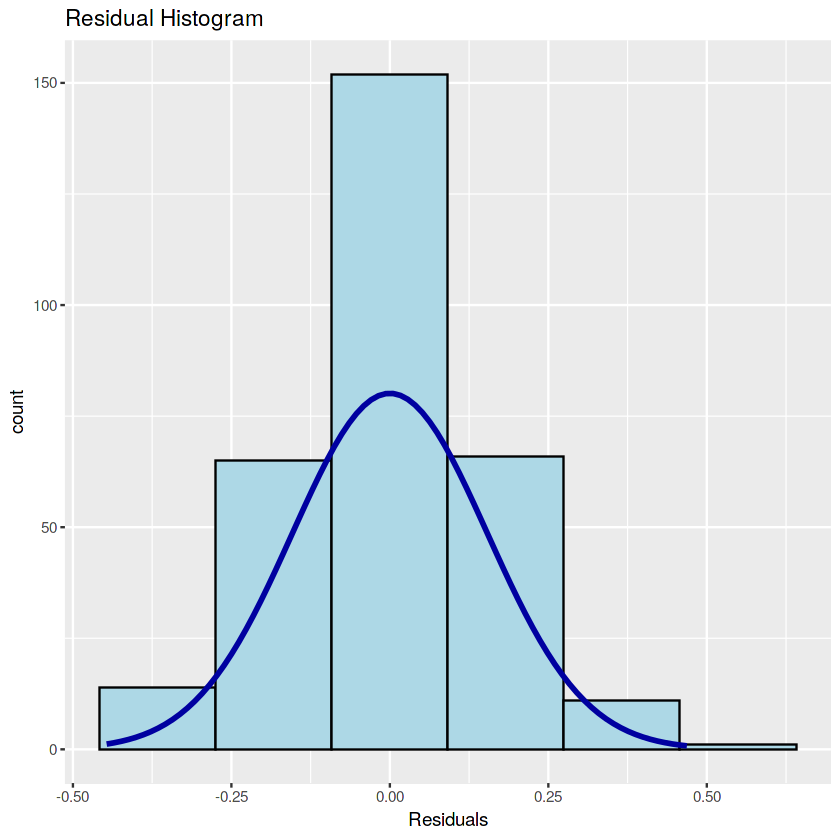

In [55]:
ols_test_normality(model6)
ols_plot_resid_hist(model6)

The p-value of the shapiro test which is above 0.05 so we do not reject null hypothesis. Our residuals are normally distributed. 

#### We can conclude that removing outliers works well. Our model has no problem anymore.

### 2- Robust Estimation 

To solve the non-normality of residuals problem, we used robust estimation. For Robust regression model we will use the same OLS model and what we examined for residuals and Cook’s distance.

In [56]:
model7 <- rlm(lreal_price ~ near_dump + d89 + houseage + houseage_sq + l_area +l_area_sq + l_land + nbh_0 +rooms +baths , data = dumpdata)

summary(model7)


Call: rlm(formula = lreal_price ~ near_dump + d89 + houseage + houseage_sq + 
    l_area + l_area_sq + l_land + nbh_0 + rooms + baths, data = dumpdata)
Residuals:
      Min        1Q    Median        3Q       Max 
-1.222201 -0.101194  0.001896  0.089822  0.724625 

Coefficients:
            Value   Std. Error t value
(Intercept) 20.2160  3.5187     5.7453
near_dump   -0.0215  0.0280    -0.7657
d89         -0.0990  0.0187    -5.2944
houseage    -0.0076  0.0010    -7.2113
houseage_sq  0.0000  0.0000     5.0577
l_area      -3.0087  0.9279    -3.2425
l_area_sq    0.2262  0.0613     3.6885
l_land       0.0486  0.0161     3.0192
nbh_0        0.0588  0.0195     3.0222
rooms        0.0356  0.0135     2.6380
baths        0.0953  0.0213     4.4639

Residual standard error: 0.1428 on 310 degrees of freedom

In [57]:
resettest(model7)


	RESET test

data:  model7
RESET = 2.9188, df1 = 2, df2 = 308, p-value = 0.05549


The p-value is 0.055 which means greater than 0.05. So, we do not reject the null hypothesis. Our model is linear now.

In [58]:
bptest(model7)


	studentized Breusch-Pagan test

data:  model7
BP = 17.699, df = 10, p-value = 0.06025


P-value is above 0.05 we have constant variance of residuals so there is no heteroskedasticity in the model.

In [59]:
print(vif(model7))

  near_dump         d89    houseage houseage_sq      l_area   l_area_sq 
   2.039584    1.102985   14.808000   12.655003 1273.552570 1267.166175 
     l_land       nbh_0       rooms       baths 
   2.119805    1.138704    1.890370    3.447798 


Above table showed that we have same strongly correlated values for houseage, houseage_sq, l_area and l_area_sq which are normal.

In [60]:
shapiro.test(model7$residuals)


	Shapiro-Wilk normality test

data:  model7$residuals
W = 0.92372, p-value = 9.91e-12


The p-value of the shapiro-wilk test which is lower than 0.05 so we do reject null hypothesis. Our residuals are non-normally distributed. 

Problem is going on. Robust estimation did not fix the normality of residuals problem. Even though when we remove all extreme outliers from the model as we did for OLS model, it did not work well.

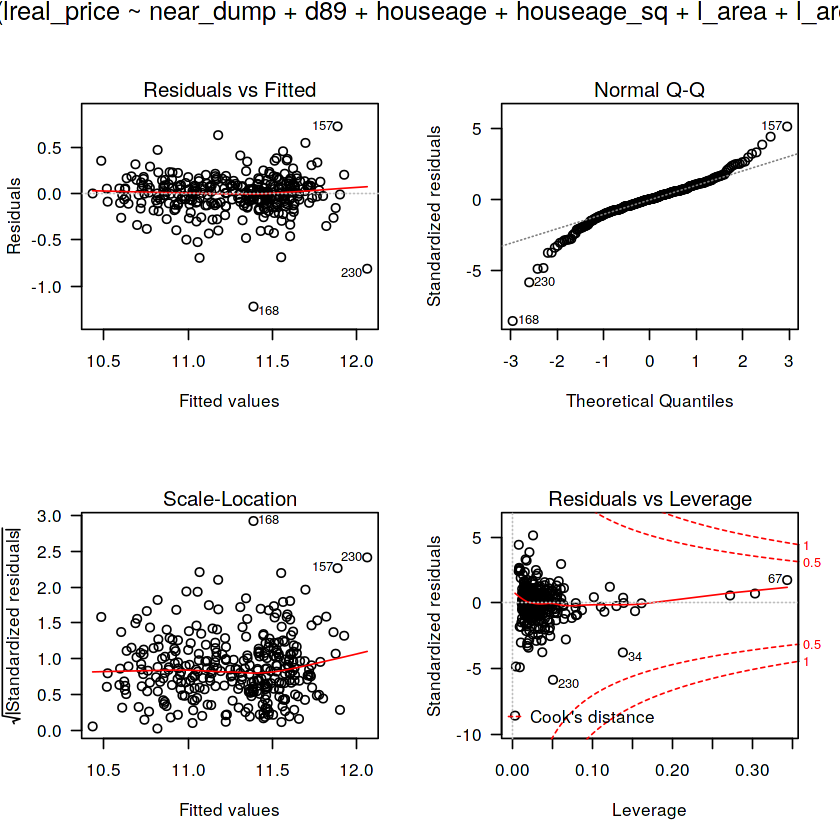

In [61]:
opar <- par(mfrow = c(2,2), oma = c(0, 0, 1.1, 0))
plot(model7, las = 1)
par(opar)


### 3- CAPPING

We assume that outliers of houseage variable generate a problem.  Outlier is any data point more than 1.5 interquartile ranges (IQRs) below the first quartile or above the third quartile. Therefore, we look at its quartiles. 

In [62]:
qnt1 <- quantile(dumpdata$houseage, probs=c(.0, .05, .25, 0.5, .75, .95), na.rm = T)
print(qnt1)

 0%  5% 25% 50% 75% 95% 
  0   0   0   4  22  80 


**IQR (Interquartile range) = Q3-Q1 = 22 - 0 = 22

first quartile – 1.5 · IQR = 0 – 33 = –33
third quartile + 1.5 · IQR = 22 + 33 = 55

To determine if there are outliers we must consider the numbers that are 1.5·IQR or 22 beyond the quartiles.

Since some of the data are outside the interval from –33 to 55, there are outliers. Therefore, we use capping to replace outliers with 5th and 95th percentile values.

Houseage which is greater than 75th percentile + 1.5IQR (55) turn into 95th percentile (80). We can observe it with the plot below.


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



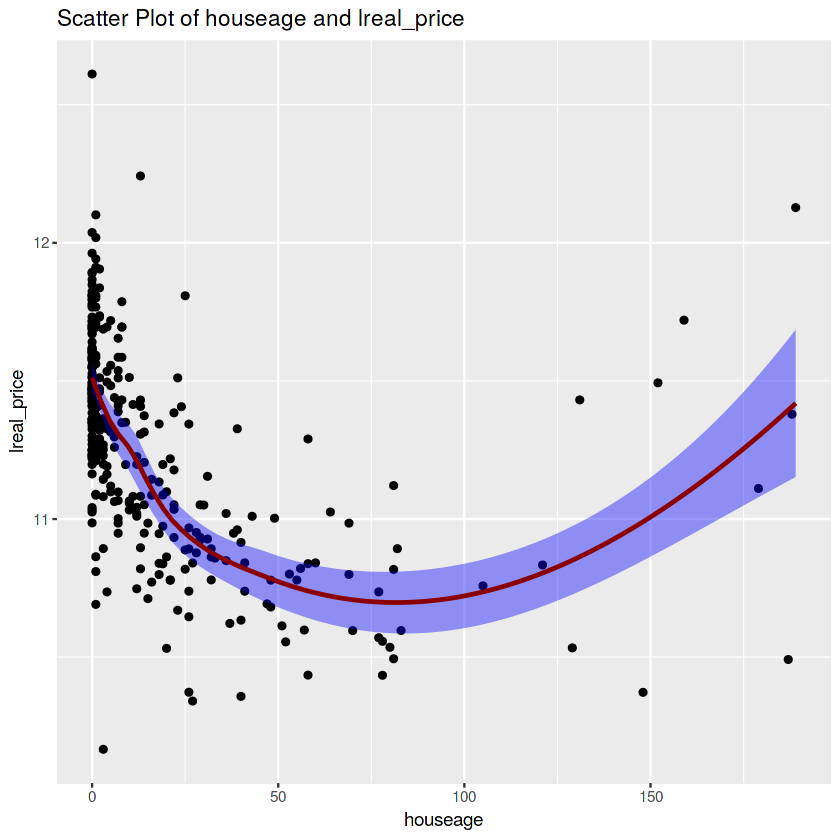

In [63]:
ggplot(dumpdata, aes(houseage, lreal_price)) + geom_point() + geom_smooth(color="darkred", fill="blue")+
    labs(title="Scatter Plot of houseage and lreal_price")

In [64]:
# Before capping
summary(lm(lreal_price ~ houseage + houseage_sq, data = dumpdata))


Call:
lm(formula = lreal_price ~ houseage + houseage_sq, data = dumpdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.24078 -0.17757 -0.02339  0.15964  1.14798 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.146e+01  2.059e-02  556.77   <2e-16 ***
houseage    -1.922e-02  1.244e-03  -15.45   <2e-16 ***
houseage_sq  1.055e-04  8.426e-06   12.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2898 on 318 degrees of freedom
Multiple R-squared:  0.4452,	Adjusted R-squared:  0.4417 
F-statistic: 127.6 on 2 and 318 DF,  p-value: < 2.2e-16


In [65]:
x <- dumpdata$houseage
qnt <- quantile(x, probs=c(.25, .75), na.rm = T)
caps <- quantile(x, probs=c(.05, .95), na.rm = T)
H <- 1.5 * IQR(x, na.rm = T)
x[x < (qnt[1] - H)] <- caps[1]
x[x > (qnt[2] + H)] <- caps[2]

dumpdata$houseage <- x
head(dumpdata)
qnt
caps

Obs,year,price,real_price,neighbourhood,area,land,rooms,baths,houseage,⋯,d89,dnear_dump,nbh_4,nbh_0,nbh_2,nbh_1,nbh_6,nbh_5,nbh_3,l_area_sq
<dbl>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1989,60047,60047,4,1657,4580,7,1,49,⋯,1,1,1,0,0,0,0,0,0,54.94907
2,1989,39984,39984,4,2614,8367,6,2,80,⋯,1,1,1,0,0,0,0,0,0,61.91545
3,1989,34023,34023,4,1142,4998,6,1,80,⋯,1,1,1,0,0,0,0,0,0,49.56915
4,1989,63891,63891,4,1135,10004,5,1,10,⋯,1,1,1,0,0,0,0,0,0,49.48261
5,1989,44036,44036,4,1864,10003,5,1,47,⋯,1,1,1,0,0,0,0,0,0,56.70813
6,1989,45985,45985,4,1784,9496,6,3,80,⋯,1,1,1,0,0,0,0,0,0,56.04938


25% 75% 
  0  22

5% 95% 
  0  80

In [66]:
# After capping
summary(lm(lreal_price ~ houseage + houseage_sq, data = dumpdata))


Call:
lm(formula = lreal_price ~ houseage + houseage_sq, data = dumpdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.22574 -0.18973 -0.01152  0.17968  1.18069 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.143e+01  2.058e-02 555.547  < 2e-16 ***
houseage    -1.311e-02  9.383e-04 -13.967  < 2e-16 ***
houseage_sq  3.063e-05  4.737e-06   6.466 3.79e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3019 on 318 degrees of freedom
Multiple R-squared:  0.3982,	Adjusted R-squared:  0.3944 
F-statistic: 105.2 on 2 and 318 DF,  p-value: < 2.2e-16


We tried to see if our model gets better using capped houseage variable but R-squared value of the model using capped houseage is lower. It shows that this model is not better than our previous model whatsoever. We are suspicious to adopt this new model.

In [67]:
# Create a model after capping.
model8 <- lm(lreal_price ~  near_dump + d89 + l_area + l_area_sq + l_land + houseage + houseage_sq +rooms + baths + nbh_0, data = dumpdata)

summary(model8)


Call:
lm(formula = lreal_price ~ near_dump + d89 + l_area + l_area_sq + 
    l_land + houseage + houseage_sq + rooms + baths + nbh_0, 
    data = dumpdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.22549 -0.09045  0.00934  0.10647  0.75239 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.864e+01  4.546e+00   4.100 5.28e-05 ***
near_dump   -3.818e-02  3.585e-02  -1.065 0.287669    
d89         -1.091e-01  2.414e-02  -4.521 8.77e-06 ***
l_area      -2.618e+00  1.199e+00  -2.183 0.029806 *  
l_area_sq    1.964e-01  7.926e-02   2.478 0.013730 *  
l_land       6.157e-02  2.118e-02   2.907 0.003908 ** 
houseage    -3.457e-03  9.449e-04  -3.659 0.000298 ***
houseage_sq -1.877e-06  3.910e-06  -0.480 0.631565    
rooms        4.766e-02  1.749e-02   2.725 0.006793 ** 
baths        1.316e-01  2.666e-02   4.937 1.30e-06 ***
nbh_0        6.435e-02  2.527e-02   2.547 0.011357 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’

The overall F-statistic of the model is 84.15 and the corresponding p-value is approximately 0 which is similar to our previous model. This indicates that the overall model is statistically significant. In other words, the regression model is useful. However, houseage_sq and near_dump variables are not significant anymore as opposed to the previous model. Coefficient of housage variable changed because its squared term is now insignificant.

* D89, houseage and baths are statistically significant at the 0.01 significance level. In particular, the coefficients from the model output tells that;
    * When year is 1989, in other words when d89 variables is 1, then d89 is associated with an approximately 10.91% decrease in lreal_price on average, assuming all other variables are held constant.
    * An increase in houseage by one year is associated with an approximately 0.35% decrease in real_price on average, assuming all other variables are held constant.
    * An increase in number of baths by 1 is associated with a 13.16% increase in real_price on average, assuming all other variables are held constant.
* L_land and rooms are statistically significant at the 0.05 significance level. In particular, the coefficient from the model output tells that;
    * An increase in land by 1% is associated with an approximately 6.157% increase in real_price on average, assuming all other variables are held constant.
    * An increase in rooms by 1 is associated with an approximately 4.766% increase in real_price on average, assuming all other variables are held constant.
* L_area, l_area_sq and nbh_0 are statistically significant at the 0.10 significance level. In particular, the coefficient from the model output tells that;
    * An increase in area by 1% is associated with a 261.8% increase in real_price on average, assuming all other variables are held constant. 
    * An increase in area_sq by 1% is associated with a 19.64% increase in real_price on average, assuming all other variables are held constant. 
    * When neighbourhood is 0, in other words when nbh_0 variable is 1, then nbh_0 is associated with an approximately 6.435% increase in real_price on average, assuming all other variables are held constant.

The adjusted R-squared is 0.7221. This indicates that 72.21% of the variance in lreal_price can be explained by the predictors in the model.


In [68]:
bptest(model8)


	studentized Breusch-Pagan test

data:  model8
BP = 18.822, df = 10, p-value = 0.04259


P-value is lower than 0.05 we do not have constant variance of residuals so there is a heteroskedasticity in the model.

In [69]:
resettest(model8)


	RESET test

data:  model8
RESET = 4.5082, df1 = 2, df2 = 308, p-value = 0.01176


The p-value is 0.011 which means lower than 0.05. So, we do reject the null hypothesis. Our model is non-linear.

In [70]:
print(vif(model8))

  near_dump         d89      l_area   l_area_sq      l_land    houseage 
   2.003522    1.103368 1276.649551 1269.816198    2.206087    4.018249 
houseage_sq       rooms       baths       nbh_0 
   2.699330    1.901373    3.230301    1.151126 


Above table show that we have strongly correlated values for l_area and l_area_sq which are normal. 

In [71]:
ols_test_normality(model8)

-----------------------------------------------
       Test             Statistic       pvalue  
-----------------------------------------------
Shapiro-Wilk              0.9361         0.0000 
Kolmogorov-Smirnov        0.0818         0.0273 
Cramer-von Mises         73.7165         0.0000 
Anderson-Darling          3.8256         0.0000 
-----------------------------------------------

The p-value of the shapiro-wilk test which is lower than 0.05 so we do reject null hypothesis. Our residuals are non-normally distributed. 

After capping, the model has gone even worse. We decided to stick with our previous model where we removed the outliers. And see below.

In [72]:
summary(model6)


Call:
lm(formula = lreal_price ~ houseage + houseage_sq + baths + d89 + 
    near_dump + l_area + l_area_sq + rooms + nbh_0 + l_land, 
    data = dumpdata, subset = Obs != 168 & Obs != 230 & Obs != 
        157 & Obs != 46 & Obs != 259 & Obs != 315 & Obs != 303 & 
        Obs != 227 & Obs != 52 & Obs != 34 & Obs != 182 & Obs != 
        166)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.44680 -0.09283  0.00288  0.09156  0.46861 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.944e+01  3.750e+00   5.183 4.03e-07 ***
houseage    -7.527e-03  1.085e-03  -6.935 2.52e-11 ***
houseage_sq  3.454e-05  7.106e-06   4.861 1.89e-06 ***
baths        1.027e-01  2.145e-02   4.789 2.65e-06 ***
d89         -9.171e-02  1.888e-02  -4.856 1.93e-06 ***
near_dump   -5.073e-02  2.898e-02  -1.750  0.08110 .  
l_area      -2.752e+00  9.958e-01  -2.764  0.00607 ** 
l_area_sq    2.091e-01  6.604e-02   3.167  0.00170 ** 
rooms        3.051e-02  1.391e-02   2.194

### DISCUSSION

When we look at the result for the population which we sample, we see that the most explanatory variable for house price are the age of the house, the number of bathrooms, and the neighborhoods where it is located. Then, the area of the house, the land of the property and the number of rooms come. The distance to the dumpsite turned out to be an insignificant variable.

When we start building model, we see that we have a problem with non-normality of residuals. This could make our interpretation biased. This bias may be stemming from the outliers, variables not listed or insufficient information about the dump sites. To mitigate the effects of the outliers, we performed log transformations for many variables and a square root transformation for houseage (due to its values of 0). About the dump site, we don’t know if there is a new dump site installed between years 1989 and 1992 for sure. If we had a chance to see the impact of a new dump site, better with the prices of the same houses (panel data), the effects of the dump site could be more obvious.

To solve this non-normality of residuals problem we encountered, we conducted several approaches.

Firstly, we observed influential observations and examined why these observations could be tagged as influential. Then, we dropped them from our regression model step by step from the top. As a conclusion, we decided to remove 12 observations from the model due to fixing all linear model assumptions.

Secondly, we used robust estimation to solve the problem. We conducted the same linear model as we explained above and put into robust regression, but this did not help to fix the problem.
Finally, we used capping method for houseage outliers, but this couldn’t solve the problem too.

It seems like the only alternative we have is the removal of influential observations. Other methods we tried are good solutions to the non-normality of the residuals problem but not effective on this dataset.

### CONCLUSION

The main purpose of this report is to develop a model which can help us understand how vicinity to a dump site affects house prices.

In the first model, we built which has only one variable, being in vicinity of a dump site was significant at 1% significance level but at 10% significance level in the last model. We believe that this is a result for adding significant variables to the model. The other models we developed all had some OLS assumption problems. In our model, we eliminated all of these problems using removal of influential observation method. 

The variables that are able to explain the variance in the house prices are age of the house, number of bathrooms and neighborhood. We found out that being in vicinity of a dump site is significant at 10% level in determining the house prices, although not as significant as aforementioned properties of a house. This is a result that we expected to get.
